# Prediccion del Precio - Datos Gilmar

#### Importar Librerias y funciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy.random import seed
from numpy.random import randn
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import ttest_ind
import scipy.stats as stats
import scipy


In [2]:
def Func_indicesOutliers(df, var, coef=1.5):
    q1 = df[var].quantile([0.25])[0.25]
    q3 = df[var].quantile([0.75])[0.75]
    irq = q3-q1
    out_low = q1-(coef*irq)
    out_hig = q3+(coef*irq)
    
    return pd.concat([ df[df[var] > out_hig] , df[df[var] < out_low] ] , axis = 0).index

In [3]:
def Func_Outliers(df: pd.DataFrame, var: str, coef=1.5) -> float:
    
    q1=df[var].quantile([.25])[0.25]
    q3=df[var].quantile([.75])[0.75]
    irq=q3-q1
    out_low=q1-(coef*irq)
    out_hig=q3+(coef*irq)
    
    
    return  irq, out_low, out_hig, round(100 * (pd.concat([df[df[var]<out_low],df[df[var]>out_hig]],axis=0)).shape[0] / df[var].shape[0],2)


#### Importar datos

In [5]:
df = pd.read_csv(r'C:\Users\carolina\Desktop\FormDataAnalyst\ExamenFinal\gilmar.csv', encoding = 'ISO-8859-1',  delimiter=';')

In [6]:
df.head(3)

,precio,m2Brutos,edad,valorTerreno,m2Util,perUni,numDormi,numChime,numServi,numHabita,calefaccion,alimentacion,tipoDesague,conVistas,construccion,aire
0,132500,9,42,50000,906,35,2,1,10,5,Electrica,Electrica,fosa septica,No,No,No
1,181115,92,0,22300,1953,51,3,0,25,6,suelo radiante,gas,fosa septica,No,No,No
2,109000,19,133,7300,1944,51,4,1,10,8,suelo radiante,gas,comunitario,No,No,No


In [7]:
df.shape #  registros 1728 / 16 variables

(1728, 16)

In [8]:
df.head(5)

,precio,m2Brutos,edad,valorTerreno,m2Util,perUni,numDormi,numChime,numServi,numHabita,calefaccion,alimentacion,tipoDesague,conVistas,construccion,aire
0,132500,9,42,50000,906,35,2,1,10,5,Electrica,Electrica,fosa septica,No,No,No
1,181115,92,0,22300,1953,51,3,0,25,6,suelo radiante,gas,fosa septica,No,No,No
2,109000,19,133,7300,1944,51,4,1,10,8,suelo radiante,gas,comunitario,No,No,No
3,155000,41,13,18700,1944,51,3,1,15,5,aerotermia,gas,fosa septica,No,No,No
4,86060,11,0,15000,840,51,2,0,10,3,aerotermia,gas,comunitario,No,Sí,Sí


In [9]:
df.sample(n=5)

,precio,m2Brutos,edad,valorTerreno,m2Util,perUni,numDormi,numChime,numServi,numHabita,calefaccion,alimentacion,tipoDesague,conVistas,construccion,aire
440,425000,46,88,19700,3003,57,4,1,35,12,aerotermia,gas,fosa septica,No,No,Sí
151,139000,14,16,19600,1343,64,2,1,15,6,Electrica,Electrica,comunitario,No,No,Sí
1488,178900,35,21,36500,1554,64,3,0,10,4,Electrica,Electrica,comunitario,No,No,No
852,144000,6,54,3600,1344,54,5,0,10,8,Electrica,Electrica,comunitario,No,No,No
1186,320900,47,5,20400,1885,21,2,1,20,7,suelo radiante,Gasoil,fosa septica,Sí,No,No


In [10]:
df.info()  ### No hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   precio        1728 non-null   int64 
 1   m2Brutos      1728 non-null   int64 
 2   edad          1728 non-null   int64 
 3   valorTerreno  1728 non-null   int64 
 4   m2Util        1728 non-null   int64 
 5   perUni        1728 non-null   int64 
 6   numDormi      1728 non-null   int64 
 7   numChime      1728 non-null   int64 
 8   numServi      1728 non-null   int64 
 9   numHabita     1728 non-null   int64 
 10  calefaccion   1728 non-null   object
 11  alimentacion  1728 non-null   object
 12  tipoDesague   1728 non-null   object
 13  conVistas     1728 non-null   object
 14  construccion  1728 non-null   object
 15  aire          1728 non-null   object
dtypes: int64(10), object(6)
memory usage: 216.1+ KB


In [11]:
df.columns

Index(['precio', 'm2Brutos', 'edad', 'valorTerreno', 'm2Util', 'perUni',
       'numDormi', 'numChime', 'numServi', 'numHabita', 'calefaccion',
       'alimentacion', 'tipoDesague', 'conVistas', 'construccion', 'aire'],
      dtype='object')

In [12]:
df.corr()

,precio,m2Brutos,edad,valorTerreno,m2Util,perUni,numDormi,numChime,numServi,numHabita
precio,1.000000,0.116191,-0.188793,0.581266,0.712390,0.200119,0.400349,0.376786,0.597250,0.531170
m2Brutos,0.116191,1.000000,-0.044326,0.045121,0.136701,-0.022302,0.107339,0.105514,0.078347,0.105812
edad,-0.188793,-0.044326,1.000000,-0.021818,-0.174242,-0.037785,0.027125,-0.172022,-0.361897,-0.082264
valorTerreno,0.581266,0.045121,-0.021818,1.000000,0.423441,0.228427,0.202449,0.211727,0.297498,0.298865
m2Util,0.712390,0.136701,-0.174242,0.423441,1.000000,0.209981,0.656196,0.473788,0.718564,0.733666
perUni,0.200119,-0.022302,-0.037785,0.228427,0.209981,1.000000,0.162919,0.246626,0.179541,0.157068
numDormi,0.400349,0.107339,0.027125,0.202449,0.656196,0.162919,1.000000,0.284475,0.458033,0.671863
numChime,0.376786,0.105514,-0.172022,0.211727,0.473788,0.246626,0.284475,1.000000,0.436234,0.319894
numServi,0.597250,0.078347,-0.361897,0.297498,0.718564,0.179541,0.458033,0.436234,1.000000,0.517585
numHabita,0.531170,0.105812,-0.082264,0.298865,0.733666,0.157068,0.671863,0.319894,0.517585,1.000000


#### Variable objetivo Precio

<AxesSubplot:ylabel='Density'>

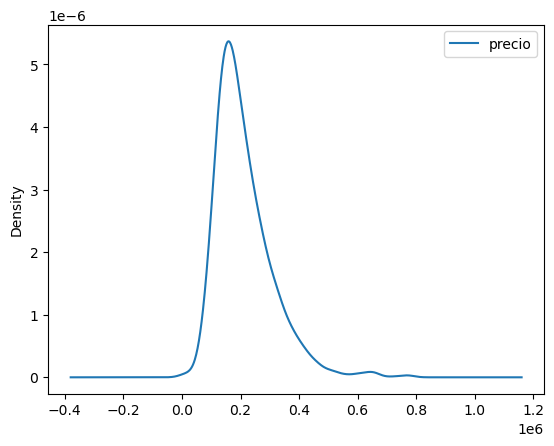

In [13]:
df[['precio']].plot.kde()

<AxesSubplot:>

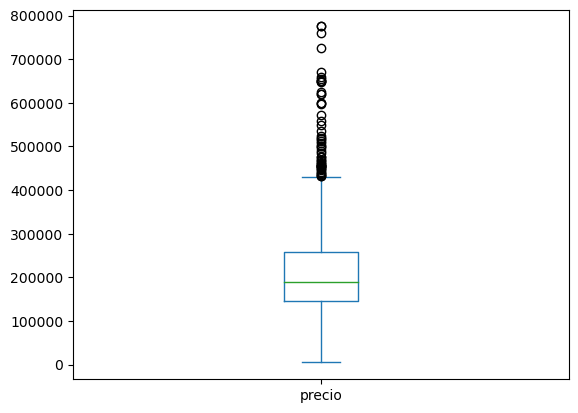

In [14]:
df[['precio']].plot.box()

array([[<AxesSubplot:title={'center':'precio'}>]], dtype=object)

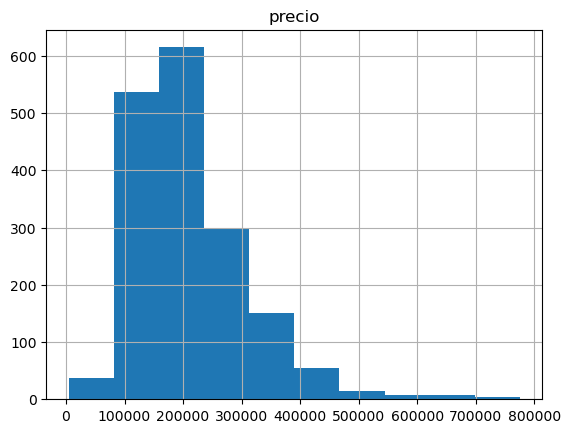

In [15]:
df[['precio']].hist()

In [16]:
indice_atipicos_precio=Func_indicesOutliers(df, 'precio')
len(indice_atipicos_precio), len(indice_atipicos_precio)*100/df.shape[0] 

(53, 3.0671296296296298)

In [389]:
Func_Outliers(df, 'precio')

(114000.0, -26000.0, 430000.0, 3.07)

In [17]:
round(Func_Outliers(df, 'precio')[3],2)

3.07

In [391]:
Func_Outliers(df, 'precio',2)

(114000.0, -83000.0, 487000.0, 1.74)

In [387]:
df.iloc[list(set(df.index.values).difference(set(indice_atipicos_precio)))]['precio'].count() #.plot.box() # 1636

1675

In [388]:
+1675+53

1728

###  Estudio del resto de las varaibles en relacion con el precio

#### m2Brutos

<AxesSubplot:>

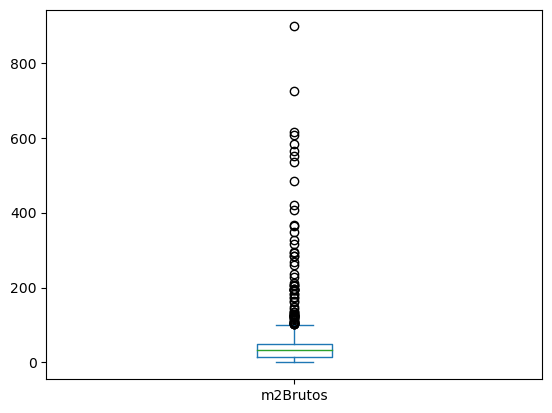

In [18]:
df['m2Brutos'].plot.box()#kde()

In [19]:
df[df['m2Brutos']<30]['m2Brutos'].count() ## hay demasiados casos con un valor de menos de 30 m2brutos

835

In [20]:
df[df['m2Util']<30]['m2Util'].count() # sin embargo no hay casos de m2 utiles de menos de 30

0

In [21]:
round(df[df['m2Brutos']<30]['m2Brutos'].count()*100/df.shape[0],2) # la mitad de los registros no tienen un valor correcto

48.32

In [22]:
## esta varaible esta fallida

In [23]:
df[['m2Brutos','m2Util']].describe()

,m2Brutos,m2Util
count,1728.000000,1728.000000
mean,40.380787,1754.975694
std,58.035467,619.935553
min,0.000000,616.000000
25%,14.000000,1300.000000
50%,32.000000,1634.500000
75%,48.000000,2137.750000
max,897.000000,5228.000000


In [24]:
df[['m2Brutos','m2Util']].corr() # esto no tiene sentido

,m2Brutos,m2Util
m2Brutos,1.000000,0.136701
m2Util,0.136701,1.000000


In [25]:
df[['m2Brutos','precio']].corr() # ademas no correlaciona con precio

,m2Brutos,precio
m2Brutos,1.000000,0.116191
precio,0.116191,1.000000


In [26]:
df['m2Brutos'].describe()

count    1728.000000
mean       40.380787
std        58.035467
min         0.000000
25%        14.000000
50%        32.000000
75%        48.000000
max       897.000000
Name: m2Brutos, dtype: float64

In [27]:
df[df['m2Brutos']>0][['m2Brutos', 'precio']].groupby(by='m2Brutos', sort=True).count().sort_values(by='m2Brutos', ascending =True)# 

,precio
m2Brutos,
1,32
2,18
3,33
4,35
5,40
...,...
584,1
607,1
615,1


In [28]:
df[['m2Brutos', 'm2Util', 'precio']].groupby(by=['m2Brutos', 'm2Util']).count()
## No hay relacion entre los m2 Brutos y los Utiles. Esta variable ademas no correlaciona con precio (.11) 
## Queda fuera del estudio

precio
m2Brutos m2Util        
0        936          1
         2472         1
1        812          1
         874          1
         960          3
...                 ...
584      2916         1
607      1240         1
615      1960         1
724      2022         1
897      704          1

[1505 rows x 1 columns]

In [29]:
df[(df['m2Brutos']>30) & (df['m2Brutos']<5000)][['m2Brutos','precio']].count() # estos podrian ser valores rezonables

m2Brutos    890
precio      890
dtype: int64

In [30]:
df[(df['m2Brutos']<=30) | (df['m2Brutos']>=5000)][['m2Brutos','precio']].count() # la otra mitad no tiene sentido

m2Brutos    838
precio      838
dtype: int64

#### edad

In [31]:
df[['edad','precio']].corr() 

,edad,precio
edad,1.000000,-0.188793
precio,-0.188793,1.000000


<AxesSubplot:>

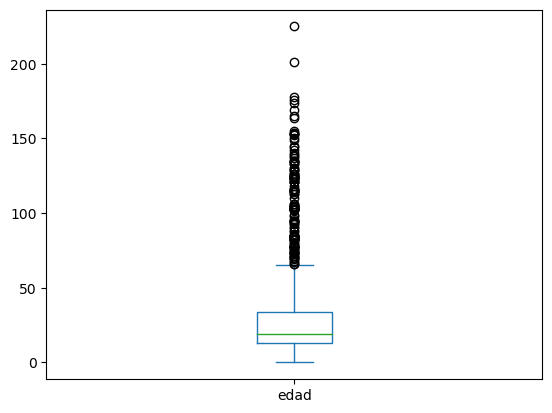

In [32]:
df[['edad']].plot.box()

In [33]:
df[df['edad']<100][['edad','precio']].corr() 

,edad,precio
edad,1.000000,-0.276479
precio,-0.276479,1.000000


In [34]:
# Tambien presenta datos incoherentes y tiene baja correlacion. 
# Antes de descartarla analizo la correlacion en el rango de datos que podria considerarse normal para esta variable.
#df[['edad', 'precio']].groupby(by=['edad']).count()
df[df['edad']<100][['edad','precio']].corr()  #son 1600 reg aprox Sigue dando muy bajo queda fuera 

,edad,precio
edad,1.000000,-0.276479
precio,-0.276479,1.000000


<AxesSubplot:>

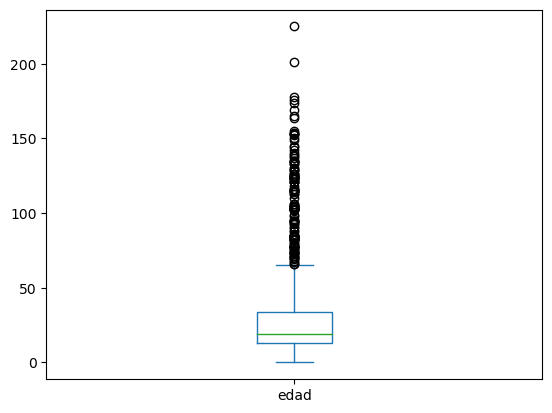

In [35]:
df['edad'].plot.box()

In [36]:
# Analizo la posibilidad de convertirla en categorica

In [37]:
df[['edad','precio']].groupby(by='edad').count()

,precio
edad,
0,83
1,75
2,17
3,29
4,21
...,...
174,1
176,1
178,1


#### valorTerreno

<AxesSubplot:ylabel='Density'>

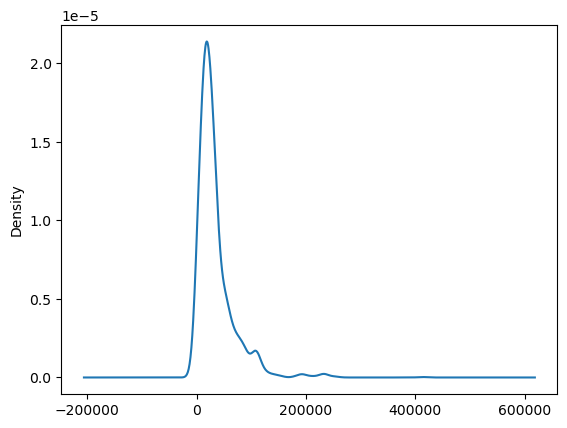

In [38]:
df['valorTerreno'].plot.kde() 
#df['precio'].hist()#plot.kde() 

In [39]:
df[['valorTerreno','precio']].corr()

,valorTerreno,precio
valorTerreno,1.000000,0.581266
precio,0.581266,1.000000


<AxesSubplot:>

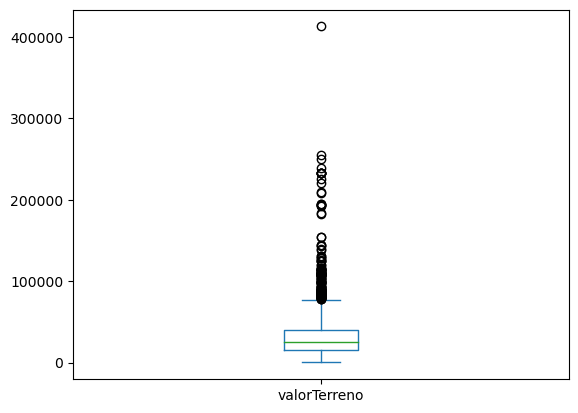

In [40]:
## Valor terreno es unna variable importante corr .58 
df[['valorTerreno']].plot.box()

In [41]:
df['valorTerreno'].describe()

count      1728.000000
mean      34557.187500
std       35021.168056
min         200.000000
25%       15100.000000
50%       25000.000000
75%       40200.000000
max      412600.000000
Name: valorTerreno, dtype: float64

In [42]:
# Hay muchos outliers. Hay que tratarlos.

#Cuantos hay?
Por_out_ValorT=Func_Outliers(df, 'valorTerreno',2.5)
Por_out_ValorT
# coef 1.5 10% outliers son muchos
# coef 2 6.5% outliers esto esta mejor 
# coef 2.5 5% outliers 

(25100.0, -47650.0, 102950.0, 5.32)

In [43]:
ind_Atipicos_ValorT=Func_indicesOutliers(df,'valorTerreno',2.5)
len(ind_Atipicos_ValorT), round(len(ind_Atipicos_ValorT)*100/df.shape[0], 2)

(92, 5.32)

In [44]:
ind_Atipicos_ValorT=Func_indicesOutliers(df,'valorTerreno',1.5)
len(ind_Atipicos_ValorT), round(len(ind_Atipicos_ValorT)*100/df.shape[0], 2)

(166, 9.61)

<AxesSubplot:>

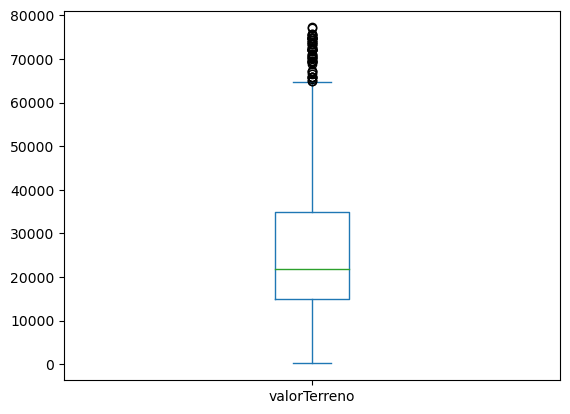

In [45]:
df.iloc[list(set(df.index.values).difference(set(ind_Atipicos_ValorT)))]['valorTerreno'].plot.box() # 1636

In [46]:
df.iloc[list(set(df.index.values).difference(set(ind_Atipicos_ValorT)))][['valorTerreno','precio']].corr()

,valorTerreno,precio
valorTerreno,1.000000,0.431258
precio,0.431258,1.000000


In [47]:
df.iloc[ind_Atipicos_ValorT][['valorTerreno','precio']].corr()

,valorTerreno,precio
valorTerreno,1.000000,0.363743
precio,0.363743,1.000000


In [48]:
df.iloc[df.index.values][['valorTerreno','precio']].corr()

,valorTerreno,precio
valorTerreno,1.000000,0.581266
precio,0.581266,1.000000


#### Copio a otro df para hacer el tratamiento de los outliers

In [49]:
df_aux=df.copy() #[list(set(df.index.values).difference(set(ind_Atipicos_ValorT)))]

In [50]:
df_aux.shape

(1728, 16)

In [51]:
Func_Outliers(df_aux, 'valorTerreno',2.5)

(25100.0, -47650.0, 102950.0, 5.32)

In [52]:
Func_Outliers(df_aux, 'valorTerreno')

(25100.0, -22550.0, 77850.0, 9.61)

In [53]:
Func_Outliers(df_aux, 'valorTerreno',2.5)

(25100.0, -47650.0, 102950.0, 5.32)

In [54]:
df_aux[df_aux['valorTerreno']>77850.0]['precio'].count() 

166

In [60]:
# Como se observa en la grafica no hay valores por debajo del rango minimo
df_aux[df['valorTerreno']<Func_Outliers(df_aux, 'valorTerreno')[1]]['precio'].count()

0

In [61]:
df_aux[df_aux['valorTerreno']>Func_Outliers(df_aux, 'valorTerreno')[2]]['precio'].count() # 121

166

In [62]:
df_aux[df_aux['valorTerreno']>Func_Outliers(df_aux, 'valorTerreno',2.5)[2]]['precio'].count() 

92

In [63]:
Func_Outliers(df_aux, 'valorTerreno')[2]

77850.0

In [64]:
Func_Outliers(df_aux,'valorTerreno') 

(25100.0, -22550.0, 77850.0, 9.61)

In [66]:
df_aux[df_aux['valorTerreno']<77850.0][['precio','valorTerreno']].corr()

,precio,valorTerreno
precio,1.000000,0.431258
valorTerreno,0.431258,1.000000


In [67]:
ind_VT=Func_indicesOutliers(df_aux, 'valorTerreno')

#### Recuperacion de los outliers

In [68]:
df_aux.iloc[ind_VT,3]=77850 ## Asignacion del valor mas alto del rango a los outliers

In [69]:
df_aux[df_aux['valorTerreno']==77850.0]

,precio,m2Brutos,edad,valorTerreno,m2Util,perUni,numDormi,numChime,numServi,numHabita,calefaccion,alimentacion,tipoDesague,conVistas,construccion,aire
172,340000,75,12,77850,2836,64,4,1,25,10,aerotermia,gas,comunitario,No,No,Sí
200,362360,59,0,77850,3020,64,4,1,25,9,aerotermia,gas,comunitario,No,Sí,Sí
233,490000,34,18,77850,1346,52,3,1,20,6,aerotermia,Gasoil,comunitario,Sí,No,No
313,625000,45,14,77850,5228,64,4,4,40,12,aerotermia,gas,comunitario,No,No,Sí
324,270000,38,18,77850,2078,64,4,1,25,8,aerotermia,Electrica,fosa septica,No,No,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,508000,17,1,77850,3511,64,4,1,25,12,aerotermia,gas,comunitario,No,No,No
1670,409550,69,1,77850,2719,61,3,1,20,9,aerotermia,gas,fosa septica,No,Sí,Sí
1673,385900,4,1,77850,3008,61,4,1,25,11,aerotermia,gas,comunitario,No,Sí,Sí
1680,382406,44,1,77850,2712,51,4,1,25,12,aerotermia,gas,comunitario,No,Sí,Sí


<AxesSubplot:>

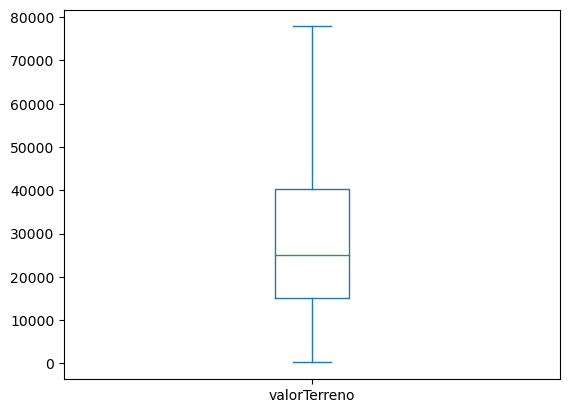

In [70]:
df_aux[['valorTerreno']].plot.box()

In [71]:
df_aux[['valorTerreno','precio']].corr()

,valorTerreno,precio
valorTerreno,1.000000,0.566488
precio,0.566488,1.000000


### m2Util

In [72]:
df_aux[['m2Util','precio']].corr()

,m2Util,precio
m2Util,1.00000,0.71239
precio,0.71239,1.00000


<AxesSubplot:>

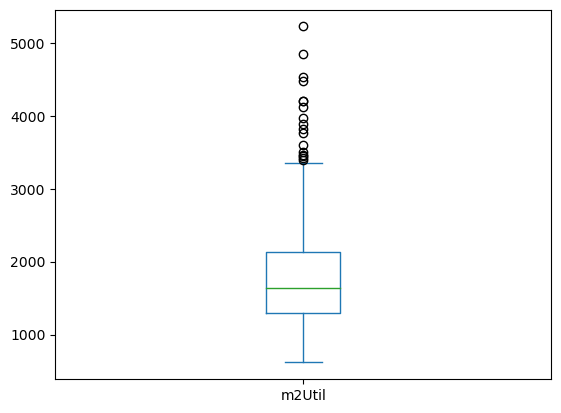

In [73]:
## Variable m2Util esta variable es importante corr .73
## presenta outliers por arriba 
#df[['m2Util']].plot.kde()
df_aux[['m2Util']].plot.box()

In [74]:
# Hay outliers. Hay que tratarlos.
Por_out_ValorU=Func_Outliers(df_aux, 'm2Util')
Por_out_ValorU

(837.75, 43.375, 3394.375, 0.98)

In [75]:
ind_Atipicos_ValorU=Func_indicesOutliers(df_aux,'m2Util')
len(ind_Atipicos_ValorU), round(len(ind_Atipicos_ValorU)*100/df.shape[0], 2)

(17, 0.98)

<AxesSubplot:>

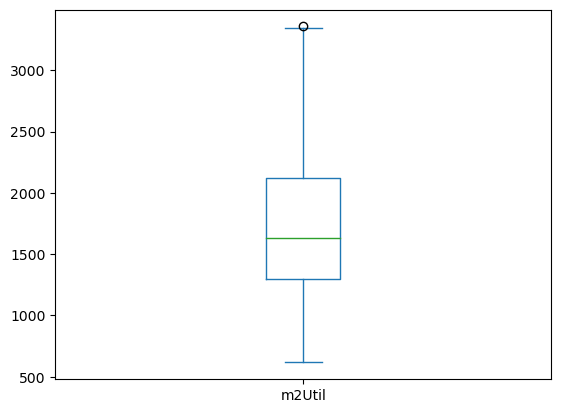

In [76]:
df_aux.iloc[list(set(df_aux.index.values).difference(set(ind_Atipicos_ValorU)))]['m2Util'].plot.box() 

In [77]:
df_aux.iloc[list(set(df_aux.index.values).\
difference(set(ind_Atipicos_ValorU)))][['m2Util','precio']].corr()

,m2Util,precio
m2Util,1.000000,0.684993
precio,0.684993,1.000000


In [78]:
df.iloc[ind_Atipicos_ValorU][['m2Util','precio']].corr() ## esta es la correlacion de los atipicos

,m2Util,precio
m2Util,1.000000,0.271303
precio,0.271303,1.000000


#### Eliminacion de los atipicos

In [79]:
# 1728-17=1711 correcto

In [80]:
df_aux.iloc[list(set(df_aux.index.values).\
difference(set(ind_Atipicos_ValorU)))].count()

precio          1711
m2Brutos        1711
edad            1711
valorTerreno    1711
m2Util          1711
perUni          1711
numDormi        1711
numChime        1711
numServi        1711
numHabita       1711
calefaccion     1711
alimentacion    1711
tipoDesague     1711
conVistas       1711
construccion    1711
aire            1711
dtype: int64

In [82]:
df.shape

(1728, 16)

In [86]:
df_aux.loc[list(set(df_aux.index.values).difference(set(ind_Atipicos_ValorU)))].shape

(1711, 16)

In [87]:
#### Elimino 17 reg outliers m2Util

In [89]:
df_aux=df_aux.loc[list(set(df_aux.index.values).difference(set(ind_Atipicos_ValorU)))]

In [90]:
df_aux.shape

(1711, 16)

#### perUni

In [91]:
df_aux[['perUni','precio']].corr() # correlacion baja

,perUni,precio
perUni,1.000000,0.199075
precio,0.199075,1.000000


<AxesSubplot:>

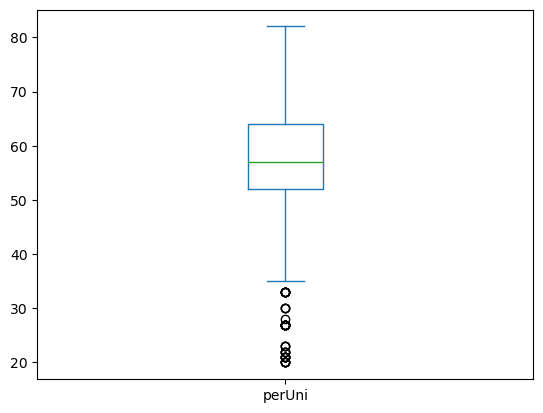

In [92]:
df_aux[['perUni']].plot.box()

In [93]:
# Hay outliers. Hay que tratarlos.
Por_out_ValorPU=Func_Outliers(df_aux, 'perUni')
Por_out_ValorPU

(12.0, 34.0, 82.0, 2.4)

In [94]:
ind_Atipicos_ValorPU=Func_indicesOutliers(df_aux,'perUni')
len(ind_Atipicos_ValorPU), round(len(ind_Atipicos_ValorPU)*100/df.shape[0], 2)

(41, 2.37)

<AxesSubplot:>

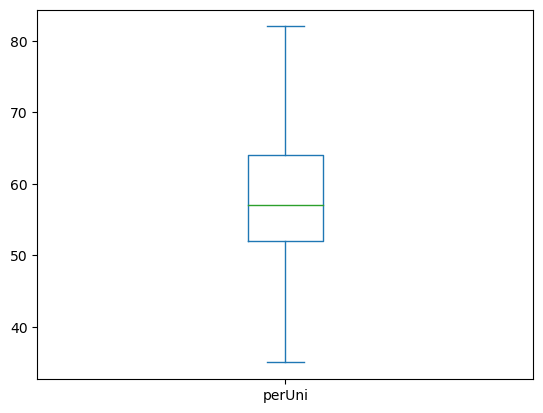

In [95]:
df_aux.loc[list(set(df_aux.index.values).difference(set(ind_Atipicos_ValorPU)))]['perUni'].plot.box() ## iloc da error por fuera de rango

In [96]:
df_aux.loc[list(set(df_aux.index.values).\
difference(set(ind_Atipicos_ValorU)))][['perUni','precio']].corr()

,perUni,precio
perUni,1.000000,0.199075
precio,0.199075,1.000000


In [97]:
# df[['perUni', 'precio']].groupby(by='perUni', sort='perUni').count()

#### numDormi

In [98]:
## cuantitativa discreta. Miro la frecuencia y veo la distribucion.

In [99]:
df_aux[['numDormi','precio']].corr() 

,numDormi,precio
numDormi,1.000000,0.388102
precio,0.388102,1.000000


<AxesSubplot:ylabel='Density'>

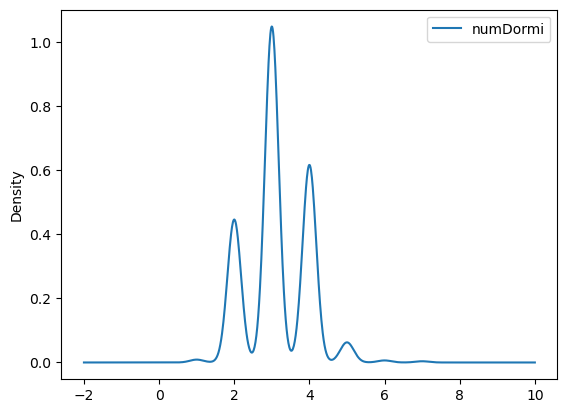

In [100]:
df_aux[['numDormi']].plot.kde() 

In [101]:
df_aux[['numDormi', 'precio']].groupby(by='numDormi', sort='numDormi').count() 

,precio
numDormi,
1,7
2,348
3,818
4,481
5,49
6,5
7,3


In [102]:
## 40% de correlacion
# Vamos a considerar los registros con numDormi entre 2 y 5 dormitorios. Consideraremos outliers las de 1,6 y 7
# Son 15 reg representan menos del 1% (de esta manera quitamos ruido/casos extremos que no interesa considerar)

In [103]:
df_aux[(df_aux['numDormi']>=2) & (df_aux['numDormi']<=5) ][['numDormi', 'precio']].corr()

,numDormi,precio
numDormi,1.000000,0.406777
precio,0.406777,1.000000


In [104]:
df_aux.head(2)

,precio,m2Brutos,edad,valorTerreno,m2Util,perUni,numDormi,numChime,numServi,numHabita,calefaccion,alimentacion,tipoDesague,conVistas,construccion,aire
0,132500,9,42,50000,906,35,2,1,10,5,Electrica,Electrica,fosa septica,No,No,No
1,181115,92,0,22300,1953,51,3,0,25,6,suelo radiante,gas,fosa septica,No,No,No


#### Recategorizo y Convierto a dummy la variable numDormi 

In [105]:
# creo las columnas
df_aux['DormiHasta2']=0
df_aux['Dormi3']=0
df_aux['DormiDesde4']=0
df_aux[['numDormi','DormiHasta2','Dormi3','DormiDesde4']]

,numDormi,DormiHasta2,Dormi3,DormiDesde4
0,2,0,0,0
1,3,0,0,0
2,4,0,0,0
3,3,0,0,0
4,2,0,0,0
...,...,...,...,...
1723,5,0,0,0
1724,4,0,0,0
1725,2,0,0,0
1726,3,0,0,0


In [107]:
df_aux.columns

Index(['precio', 'm2Brutos', 'edad', 'valorTerreno', 'm2Util', 'perUni',
       'numDormi', 'numChime', 'numServi', 'numHabita', 'calefaccion',
       'alimentacion', 'tipoDesague', 'conVistas', 'construccion', 'aire',
       'DormiHasta2', 'Dormi3', 'DormiDesde4'],
      dtype='object')

In [108]:
## Asigno los valores a las columnas creadas

In [109]:
df_aux.loc[df_aux[(df_aux['numDormi']<=2)].index,'DormiHasta2']=1
df_aux.loc[df_aux[(df_aux['numDormi']==3)].index,'Dormi3']=1
df_aux.loc[df_aux[(df_aux['numDormi']>=4)].index,'DormiDesde4']=1
df_aux[['numDormi','DormiHasta2','Dormi3','DormiDesde4']].sample(10)


,numDormi,DormiHasta2,Dormi3,DormiDesde4
707,3,0,1,0
223,3,0,1,0
678,3,0,1,0
114,4,0,0,1
1385,4,0,0,1
1,3,0,1,0
1062,2,1,0,0
449,1,1,0,0
652,3,0,1,0
1404,3,0,1,0


In [110]:
df_aux[['numDormi', 'precio']].groupby(by='numDormi', sort='numDormi').count() 

,precio
numDormi,
1,7
2,348
3,818
4,481
5,49
6,5
7,3


In [111]:
df_aux['DormiHasta2'].sum(), df_aux['Dormi3'].sum(), df_aux['DormiDesde4'].sum()

(355, 818, 538)

In [112]:
df_aux[['numDormi','DormiHasta2','Dormi3','DormiDesde4']].sample(5)


,numDormi,DormiHasta2,Dormi3,DormiDesde4
1276,3,0,1,0
967,3,0,1,0
407,4,0,0,1
162,3,0,1,0
1411,4,0,0,1


#### numChime

In [113]:
df_aux[['numChime','precio']].corr() # Baja correlacion

,numChime,precio
numChime,1.000000,0.338392
precio,0.338392,1.000000


<AxesSubplot:ylabel='Density'>

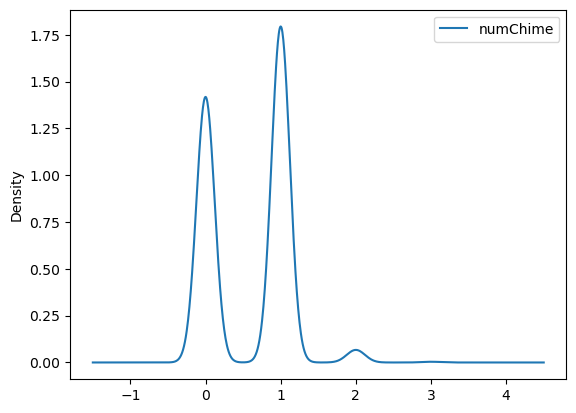

In [114]:
df_aux[['numChime']].plot.kde() 

In [115]:
df_aux[['numChime', 'precio']].groupby(by='numChime', sort='numChime').count() 

,precio
numChime,
0,739
1,935
2,35
3,2


In [116]:
# Debido a la distribucion de la variable la convertire en Dummy con/sin chimenea (740 sin/990 con aprox)

#### ASIGNACION para convertir la variable en booleana

In [118]:
df_aux.loc[list(df_aux[(df_aux['numChime']==2) | (df_aux['numChime']==3)].index), ['numChime']] = 1 # 37 ok # con loc sino no va

In [119]:
df_aux.head(2)

,precio,m2Brutos,edad,valorTerreno,m2Util,perUni,numDormi,numChime,numServi,numHabita,calefaccion,alimentacion,tipoDesague,conVistas,construccion,aire,DormiHasta2,Dormi3,DormiDesde4
0,132500,9,42,50000,906,35,2,1,10,5,Electrica,Electrica,fosa septica,No,No,No,1,0,0
1,181115,92,0,22300,1953,51,3,0,25,6,suelo radiante,gas,fosa septica,No,No,No,0,1,0


In [120]:
df_aux[['numChime', 'precio']].groupby(by='numChime', sort='numChime').count() 

,precio
numChime,
0,739
1,972


In [121]:
df_aux[['numChime','precio']].corr()

,numChime,precio
numChime,1.000000,0.324571
precio,0.324571,1.000000


In [122]:
# Evaluo correlacion con t-test

In [123]:
ttest_ind(df_aux[df_aux['numChime']==0]['precio'], df_aux[df_aux['numChime']==1]['precio']) 

Ttest_indResult(statistic=-14.185800339770061, pvalue=2.8914399670481453e-43)

In [125]:
#El p-value es bajo 

In [126]:
df_aux[df_aux['numChime']==0][['precio']].sort_values(by='precio')

,precio
458,20000
108,25000
121,45000
1143,58500
18,60000
...,...
843,500000
1253,571000
1194,655000
1278,670000


<AxesSubplot:ylabel='Density'>

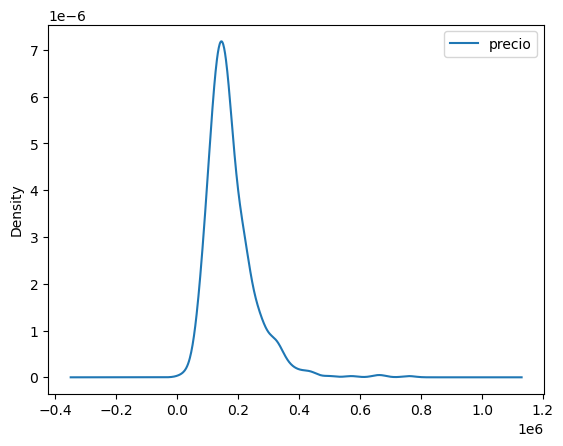

In [127]:
df_aux[df_aux['numChime']==0][['precio']].plot.kde()

<AxesSubplot:ylabel='Density'>

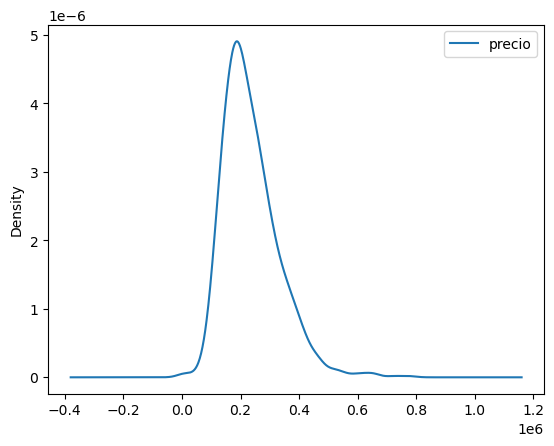

In [128]:
df_aux[df_aux['numChime']==1][['precio']].plot.kde()

#### numServi

In [129]:
df_aux[['numServi','precio']].corr()

,numServi,precio
numServi,1.000000,0.579038
precio,0.579038,1.000000


In [130]:
# esta variable no se corresponde con la descripcion. 
# No se de que dato se trata pero correlaciona al .58. No la puedo desestimar.
# De esta quito 0, 40 (4 reg 0.2%) Tratar 30 y 35 tambien como outliers.

In [131]:
df_aux[['numServi', 'precio']].groupby(by='numServi', sort='numServi').count()

,precio
numServi,
0,1
10,325
15,497
20,255
25,544
30,55
35,31
40,3


In [132]:
df_aux.shape

(1711, 19)

In [133]:
df_aux.loc[list(df_aux[(df_aux['numServi']==0) | (df_aux['numServi']==40)].index), ['numServi']] # son estos 4

,numServi
72,40
553,40
1095,40
1493,0


In [134]:
list(df_aux[(df_aux['numServi']==0) | (df_aux['numServi']==40)].index)

[72, 553, 1095, 1493]

In [135]:
len(list(df_aux[(df_aux['numServi']!=0) & (df_aux['numServi']!=40)].index)) # estos deben quedar

1707

#### ELIIMINACION en numServi 4 reg

In [136]:
df_aux=df_aux.loc[list(df_aux[(df_aux['numServi']!=0) & (df_aux['numServi']!=40)].index)]

In [137]:
df_aux.shape

(1707, 19)

In [138]:
df_aux[['numServi', 'precio']].groupby(by='numServi', sort='numServi').count() # Los dos ultimos tienen pocos reg.

,precio
numServi,
10,325
15,497
20,255
25,544
30,55
35,31


In [139]:
Func_Outliers(df_aux, 'numServi') # No cuenta con outliers

(10.0, 0.0, 40.0, 0.0)

In [140]:
Func_Outliers(df_aux, 'numServi',1) # este parace ser el coeficiente que aplica el box&whiskers

(10.0, 5.0, 35.0, 0.0)

<AxesSubplot:>

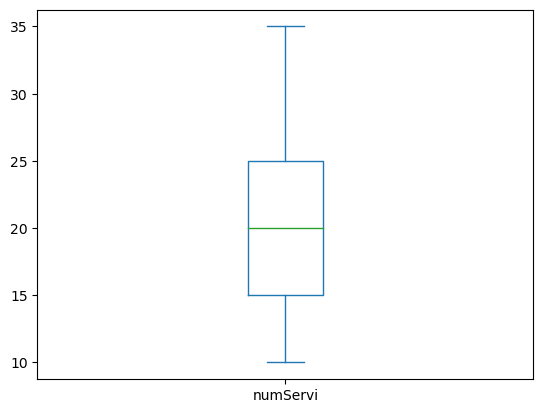

In [141]:
df_aux[['numServi']].plot.box()

In [142]:
df_aux[['numServi','precio']].corr()

,numServi,precio
numServi,1.000000,0.577936
precio,0.577936,1.000000


#### numHabita

In [143]:
df_aux[['numHabita','precio']].corr()

,numHabita,precio
numHabita,1.000000,0.503682
precio,0.503682,1.000000


In [144]:
df_aux[['numHabita', 'precio']].groupby(by='numHabita', sort='numHabita').count()  

,precio
numHabita,
2,2
3,80
4,181
5,222
6,247
7,305
8,258
9,142
10,140


In [145]:
len(list(df_aux[(df_aux['numHabita']>3) & (df_aux['numHabita']<11)].index)) # 87%

1495

In [146]:
df_aux.loc[list(df_aux[(df_aux['numHabita']>3) & (df_aux['numHabita']<11)].index)][['numHabita','precio']].corr()
# Si quito los extremos baja la correlacion. Con tal que se queda asi.

,numHabita,precio
numHabita,1.000000,0.395766
precio,0.395766,1.000000


<AxesSubplot:>

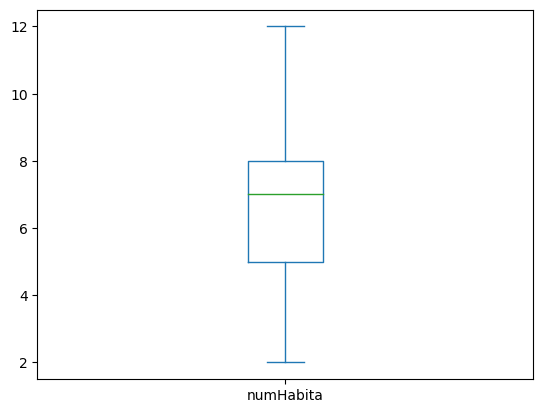

In [147]:
df_aux[['numHabita']].plot.box()

#### ESTUDIO DE LA CORRELACION DE LA VARIBLE OBJETIVO CON LAS CUALITATIVAS


#### calefaccion

In [148]:
df_aux['calefaccion'].value_counts() # Se ve correcta

aerotermia        1106
Electrica          304
suelo radiante     297
Name: calefaccion, dtype: int64

In [149]:
# dummifico calefaccion 

In [150]:
pd.get_dummies(df_aux['calefaccion'])

,Electrica,aerotermia,suelo radiante
0,1,0,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
1723,0,0,1
1724,0,0,1
1725,0,1,0
1726,0,1,0


In [151]:
df_aux[['calef_elec','calef_aero','calef_suelo']]=pd.get_dummies(df['calefaccion'])

In [152]:
df_aux.head(3)

,precio,m2Brutos,edad,valorTerreno,m2Util,perUni,numDormi,numChime,numServi,numHabita,...,tipoDesague,conVistas,construccion,aire,DormiHasta2,Dormi3,DormiDesde4,calef_elec,calef_aero,calef_suelo
0,132500,9,42,50000,906,35,2,1,10,5,...,fosa septica,No,No,No,1,0,0,1,0,0
1,181115,92,0,22300,1953,51,3,0,25,6,...,fosa septica,No,No,No,0,1,0,0,0,1
2,109000,19,133,7300,1944,51,4,1,10,8,...,comunitario,No,No,No,0,0,1,0,0,1


In [153]:
 ## Hay menos casos en suelo radiante. Quito esta dummy
    
df_aux=df_aux.drop('calef_suelo',axis=1)

In [154]:
df_aux.columns

Index(['precio', 'm2Brutos', 'edad', 'valorTerreno', 'm2Util', 'perUni',
       'numDormi', 'numChime', 'numServi', 'numHabita', 'calefaccion',
       'alimentacion', 'tipoDesague', 'conVistas', 'construccion', 'aire',
       'DormiHasta2', 'Dormi3', 'DormiDesde4', 'calef_elec', 'calef_aero'],
      dtype='object')

In [155]:
## t-test  El t-test solo admite binomial. En la combinacion a pares los p-valores dan bajos pero no se si esto es concluyente.

In [156]:
ttest_ind(df_aux[df_aux['calefaccion']=='aerotermia']['precio'], df_aux[df_aux['calefaccion']=='suelo radiante']['precio']) 

Ttest_indResult(statistic=2.7713027282540623, pvalue=0.005657086845424632)

In [157]:
ttest_ind(df_aux[df_aux['calefaccion']=='Electrica']['precio'], df_aux[df_aux['calefaccion']=='suelo radiante']['precio'])

Ttest_indResult(statistic=-7.6922573179139855, pvalue=5.970967412084628e-14)

In [158]:
ttest_ind(df_aux[df_aux['calefaccion']=='aerotermia']['precio'], df_aux[df_aux['calefaccion']=='Electrica']['precio'])

Ttest_indResult(statistic=10.309595666016246, pvalue=4.4666496735584684e-24)

In [159]:
# correlacion mediante las dummies. La correlacion es baja pero tampoco se si es correcta esta forma de evaluacion.

In [160]:
df_aux[['calef_elec','calef_aero','precio']].corr()

,calef_elec,calef_aero,precio
calef_elec,1.000000,-0.631464,-0.238655
calef_aero,-0.631464,1.000000,0.203939
precio,-0.238655,0.203939,1.000000


In [162]:
# Hasta ahora las variables cuantitativas que entran en el modelado son 'valorTerreno', 'm2Util', 'numServi','numHabita'

#### ELIMINACION dummy redundante en numDormi

In [169]:
df_aux=df_aux.drop('DormiHasta2',axis=1)

In [ ]:
# Analizare en que medida las categorias de la variable influyen en la correlacion del resto de variables.

In [178]:
df_aux[['precio','valorTerreno','m2Util','numServi', 'numHabita']].corr()

,precio,valorTerreno,m2Util,numServi,numHabita
precio,1.000000,0.549414,0.683870,0.577936,0.503682
valorTerreno,0.549414,1.000000,0.402038,0.287338,0.286955
m2Util,0.683870,0.402038,1.000000,0.702468,0.722087
numServi,0.577936,0.287338,0.702468,1.000000,0.491026
numHabita,0.503682,0.286955,0.722087,0.491026,1.000000


In [173]:
## Correlacion en las distintas categorias de calefaccion 

In [179]:
df_aux[df_aux['calefaccion']=='aerotermia'][['precio','valorTerreno','m2Util','numServi', 'numHabita']].corr()

,precio,valorTerreno,m2Util,numServi,numHabita
precio,1.000000,0.523655,0.697453,0.613010,0.529152
valorTerreno,0.523655,1.000000,0.414546,0.309952,0.304558
m2Util,0.697453,0.414546,1.000000,0.713299,0.729820
numServi,0.613010,0.309952,0.713299,1.000000,0.489289
numHabita,0.529152,0.304558,0.729820,0.489289,1.000000


In [180]:
df_aux[df_aux['calefaccion']=='Electrica'][['precio','valorTerreno','m2Util','numServi', 'numHabita']].corr()

,precio,valorTerreno,m2Util,numServi,numHabita
precio,1.000000,0.508422,0.633530,0.353501,0.350481
valorTerreno,0.508422,1.000000,0.397228,0.268818,0.151982
m2Util,0.633530,0.397228,1.000000,0.524457,0.531807
numServi,0.353501,0.268818,0.524457,1.000000,0.268271
numHabita,0.350481,0.151982,0.531807,0.268271,1.000000


In [177]:
df_aux[df_aux['calefaccion']=='suelo radiante'][['precio','valorTerreno','m2Util','numServi', 'numHabita']].corr()

,precio,valorTerreno,m2Util,numServi,numHabita
precio,1.000000,0.540490,0.536505,0.407726,0.359347
valorTerreno,0.540490,1.000000,0.162349,0.015488,0.109807
m2Util,0.536505,0.162349,1.000000,0.673205,0.727237
numServi,0.407726,0.015488,0.673205,1.000000,0.510926
numHabita,0.359347,0.109807,0.727237,0.510926,1.000000


In [181]:
# Hay variaciones en algunas correlaciones en las distintas categorias de 'calefaccion'. Pueden hacer algun aporte al modelo. 

In [ ]:
# Lo mismo para numChime

In [189]:
df_aux[['precio','valorTerreno','m2Util','numServi', 'numHabita']].corr()

,precio,valorTerreno,m2Util,numServi,numHabita
precio,1.000000,0.549414,0.683870,0.577936,0.503682
valorTerreno,0.549414,1.000000,0.402038,0.287338,0.286955
m2Util,0.683870,0.402038,1.000000,0.702468,0.722087
numServi,0.577936,0.287338,0.702468,1.000000,0.491026
numHabita,0.503682,0.286955,0.722087,0.491026,1.000000


In [193]:
df_aux[df_aux['numChime']==1][['precio','valorTerreno','m2Util','numServi', 'numHabita']].corr()

,precio,valorTerreno,m2Util,numServi,numHabita
precio,1.000000,0.532019,0.689474,0.564307,0.504267
valorTerreno,0.532019,1.000000,0.458606,0.313716,0.306878
m2Util,0.689474,0.458606,1.000000,0.682739,0.751227
numServi,0.564307,0.313716,0.682739,1.000000,0.509845
numHabita,0.504267,0.306878,0.751227,0.509845,1.000000


In [191]:
df_aux[df_aux['numChime']==0][['precio','valorTerreno','m2Util','numServi', 'numHabita']].corr()

,precio,valorTerreno,m2Util,numServi,numHabita
precio,1.000000,0.520555,0.533555,0.430911,0.353136
valorTerreno,0.520555,1.000000,0.208633,0.118705,0.155026
m2Util,0.533555,0.208633,1.000000,0.559904,0.577145
numServi,0.430911,0.118705,0.559904,1.000000,0.283298
numHabita,0.353136,0.155026,0.577145,0.283298,1.000000


In [ ]:
# Tambien se observan cambios en la correlacion de las cuantitativas por lo que entiendo que pueden servir para ajustar el modelo.

In [ ]:
# Lo mismo con numChime

In [194]:
df_aux[['precio','valorTerreno','m2Util','numServi', 'numHabita']].corr()

,precio,valorTerreno,m2Util,numServi,numHabita
precio,1.000000,0.549414,0.683870,0.577936,0.503682
valorTerreno,0.549414,1.000000,0.402038,0.287338,0.286955
m2Util,0.683870,0.402038,1.000000,0.702468,0.722087
numServi,0.577936,0.287338,0.702468,1.000000,0.491026
numHabita,0.503682,0.286955,0.722087,0.491026,1.000000


In [195]:
df_aux[df_aux['Dormi3']==0][['precio','valorTerreno','m2Util','numServi', 'numHabita']].corr()

,precio,valorTerreno,m2Util,numServi,numHabita
precio,1.000000,0.540822,0.726334,0.613267,0.578792
valorTerreno,0.540822,1.000000,0.448732,0.319837,0.357757
m2Util,0.726334,0.448732,1.000000,0.752337,0.794043
numServi,0.613267,0.319837,0.752337,1.000000,0.576738
numHabita,0.578792,0.357757,0.794043,0.576738,1.000000


In [196]:
df_aux[df_aux['Dormi3']==1][['precio','valorTerreno','m2Util','numServi', 'numHabita']].corr()

,precio,valorTerreno,m2Util,numServi,numHabita
precio,1.000000,0.560297,0.613251,0.512191,0.347818
valorTerreno,0.560297,1.000000,0.346030,0.238881,0.174371
m2Util,0.613251,0.346030,1.000000,0.598766,0.480794
numServi,0.512191,0.238881,0.598766,1.000000,0.286023
numHabita,0.347818,0.174371,0.480794,0.286023,1.000000


In [197]:
df_aux[df_aux['DormiDesde4']==0][['precio','valorTerreno','m2Util','numServi', 'numHabita']].corr()

,precio,valorTerreno,m2Util,numServi,numHabita
precio,1.000000,0.555608,0.618517,0.499887,0.368467
valorTerreno,0.555608,1.000000,0.342216,0.206376,0.200861
m2Util,0.618517,0.342216,1.000000,0.615033,0.515614
numServi,0.499887,0.206376,0.615033,1.000000,0.295203
numHabita,0.368467,0.200861,0.515614,0.295203,1.000000


In [198]:
df_aux[df_aux['DormiDesde4']==1][['precio','valorTerreno','m2Util','numServi', 'numHabita']].corr()

,precio,valorTerreno,m2Util,numServi,numHabita
precio,1.000000,0.438585,0.631172,0.491890,0.392647
valorTerreno,0.438585,1.000000,0.349314,0.234175,0.181611
m2Util,0.631172,0.349314,1.000000,0.598974,0.620141
numServi,0.491890,0.234175,0.598974,1.000000,0.339612
numHabita,0.392647,0.181611,0.620141,0.339612,1.000000


In [ ]:
## Tambien hay cambios. Creo que pueden ajustar el modelo.

#### alimentacion

In [199]:
df_aux['alimentacion'].value_counts() # Se ve correcta

gas          1179
Electrica     314
Gasoil        214
Name: alimentacion, dtype: int64

In [200]:
df_aux[['precio','valorTerreno','m2Util','numServi', 'numHabita']].corr()

,precio,valorTerreno,m2Util,numServi,numHabita
precio,1.000000,0.549414,0.683870,0.577936,0.503682
valorTerreno,0.549414,1.000000,0.402038,0.287338,0.286955
m2Util,0.683870,0.402038,1.000000,0.702468,0.722087
numServi,0.577936,0.287338,0.702468,1.000000,0.491026
numHabita,0.503682,0.286955,0.722087,0.491026,1.000000


In [201]:
df_aux[df_aux['alimentacion']=='gas'][['precio','valorTerreno','m2Util','numServi', 'numHabita']].corr()

,precio,valorTerreno,m2Util,numServi,numHabita
precio,1.000000,0.528557,0.690677,0.582821,0.506224
valorTerreno,0.528557,1.000000,0.371838,0.231772,0.256216
m2Util,0.690677,0.371838,1.000000,0.717615,0.733665
numServi,0.582821,0.231772,0.717615,1.000000,0.513025
numHabita,0.506224,0.256216,0.733665,0.513025,1.000000


In [202]:
df_aux[df_aux['alimentacion']=='Electrica'][['precio','valorTerreno','m2Util','numServi', 'numHabita']].corr()

,precio,valorTerreno,m2Util,numServi,numHabita
precio,1.000000,0.582852,0.660765,0.412543,0.375933
valorTerreno,0.582852,1.000000,0.431753,0.317505,0.204978
m2Util,0.660765,0.431753,1.000000,0.559872,0.524723
numServi,0.412543,0.317505,0.559872,1.000000,0.250505
numHabita,0.375933,0.204978,0.524723,0.250505,1.000000


In [203]:
df_aux[df_aux['alimentacion']=='Gasoil'][['precio','valorTerreno','m2Util','numServi', 'numHabita']].corr()

,precio,valorTerreno,m2Util,numServi,numHabita
precio,1.000000,0.364580,0.431556,0.438402,0.352578
valorTerreno,0.364580,1.000000,0.169984,0.146687,0.194331
m2Util,0.431556,0.169984,1.000000,0.577763,0.704544
numServi,0.438402,0.146687,0.577763,1.000000,0.396068
numHabita,0.352578,0.194331,0.704544,0.396068,1.000000


In [204]:
## Las distintas categorias de esta variable producen cambios en la correlacion de las cuantitativas. Se dumifica y se incorpora al modelo.

In [ ]:
### dummificacion 'alimentacion'

In [205]:
df_aux.loc[:,'alimentacion'].value_counts()

gas          1179
Electrica     314
Gasoil        214
Name: alimentacion, dtype: int64

In [207]:
pd.get_dummies(df_aux['alimentacion']).head()

,Electrica,Gasoil,gas
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [209]:
df_aux[['alim_elec','alim_gasoil','alim_gas']]=pd.get_dummies(df_aux['alimentacion'])
df_aux.sample(5)

,precio,m2Brutos,edad,valorTerreno,m2Util,perUni,numDormi,numChime,numServi,numHabita,...,conVistas,construccion,aire,Dormi3,DormiDesde4,calef_elec,calef_aero,alim_elec,alim_gasoil,alim_gas
474,129900,24,64,1400,1120,47,2,0,10,3,...,Sí,No,No,0,0,0,1,0,1,0
1299,260000,65,27,16500,2486,62,4,1,25,7,...,No,No,No,0,1,0,1,0,0,1
1385,335000,92,16,32700,2274,64,4,1,25,10,...,No,No,Sí,0,1,0,0,0,0,1
895,140000,15,19,15100,1628,54,3,0,25,6,...,No,No,No,1,0,1,0,1,0,0
678,161000,23,32,48200,1272,57,3,0,15,8,...,No,No,No,1,0,0,1,0,0,1


In [210]:
df_aux.loc[:,'alim_elec'].value_counts()

0    1393
1     314
Name: alim_elec, dtype: int64

In [211]:
df_aux.loc[:,'alim_gasoil'].value_counts()

0    1493
1     214
Name: alim_gasoil, dtype: int64

In [212]:
df_aux.loc[:,'alim_gas'].value_counts()

1    1179
0     528
Name: alim_gas, dtype: int64

In [208]:
df_aux.head(5)

,precio,m2Brutos,edad,valorTerreno,m2Util,perUni,numDormi,numChime,numServi,numHabita,calefaccion,alimentacion,tipoDesague,conVistas,construccion,aire,Dormi3,DormiDesde4,calef_elec,calef_aero
0,132500,9,42,50000,906,35,2,1,10,5,Electrica,Electrica,fosa septica,No,No,No,0,0,1,0
1,181115,92,0,22300,1953,51,3,0,25,6,suelo radiante,gas,fosa septica,No,No,No,1,0,0,0
2,109000,19,133,7300,1944,51,4,1,10,8,suelo radiante,gas,comunitario,No,No,No,0,1,0,0
3,155000,41,13,18700,1944,51,3,1,15,5,aerotermia,gas,fosa septica,No,No,No,1,0,0,1
4,86060,11,0,15000,840,51,2,0,10,3,aerotermia,gas,comunitario,No,Sí,Sí,0,0,0,1


In [213]:
### elimino la dummy con menor frecuencia.

In [214]:
df_aux=df_aux.drop('alim_gasoil',axis=1)

#### tipoDesague

In [216]:
df_aux['tipoDesague'].value_counts()  # elimino los nulos que representan un 0.7% del total

comunitario     1200
fosa septica     495
none              12
Name: tipoDesague, dtype: int64

In [ ]:
### correlacion mediante t-test

In [217]:
ttest_ind(df[df['tipoDesague']=='comunitario']['precio'], df[df['tipoDesague']=='fosa septica']['precio']) 

Ttest_indResult(statistic=3.1057310474861106, pvalue=0.0019291857207055152)

In [ ]:
# El p.valor es bajo. Hay dependencia.
# Elimino los nulos en tipoDesague son pocos registros.

In [220]:
df_aux=df_aux[df_aux['tipoDesague']!='none']

In [221]:
df_aux.shape

(1695, 22)

In [222]:
df_aux.loc[:,'tipoDesague'].value_counts()

comunitario     1200
fosa septica     495
Name: tipoDesague, dtype: int64

In [223]:
pd.get_dummies(df_aux['tipoDesague']).head()

,comunitario,fosa septica
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


In [224]:
df_aux[['des_comuni','des_fosa']]=pd.get_dummies(df_aux['tipoDesague'])
df_aux.sample(5)

C:\Users\carolina\AppData\Local\Temp\ipykernel_18076\250371575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux[['des_comuni','des_fosa']]=pd.get_dummies(df_aux['tipoDesague'])
C:\Users\carolina\AppData\Local\Temp\ipykernel_18076\250371575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux[['des_comuni','des_fosa']]=pd.get_dummies(df_aux['tipoDesague'])


,precio,m2Brutos,edad,valorTerreno,m2Util,perUni,numDormi,numChime,numServi,numHabita,...,construccion,aire,Dormi3,DormiDesde4,calef_elec,calef_aero,alim_elec,alim_gas,des_comuni,des_fosa
214,107500,16,20,15700,884,52,2,0,20,3,...,No,No,0,0,0,0,0,1,1,0
608,275000,3,16,27000,1812,57,2,1,25,7,...,No,Sí,0,0,0,1,0,1,1,0
1510,116500,8,22,17200,1375,64,2,0,15,4,...,No,Sí,0,0,0,1,0,1,1,0
281,195160,32,0,35000,1863,64,3,1,25,9,...,No,No,1,0,0,1,0,1,1,0
975,179000,43,37,31400,1612,63,3,1,15,7,...,No,No,1,0,0,1,0,1,1,0


In [225]:
df_aux.loc[:,'des_comuni'].value_counts()

1    1200
0     495
Name: des_comuni, dtype: int64

In [226]:
df_aux.loc[:,'des_fosa'].value_counts()

0    1200
1     495
Name: des_fosa, dtype: int64

In [213]:
### elimino la dummy con menor frecuencia.

In [227]:
df_aux=df_aux.drop('des_fosa',axis=1)

In [229]:
df_aux.loc[:,'tipoDesague'].value_counts()

comunitario     1200
fosa septica     495
Name: tipoDesague, dtype: int64

In [231]:
df_aux.loc[:,'des_comuni'].value_counts()

1    1200
0     495
Name: des_comuni, dtype: int64

#### conVistas

In [232]:
df_aux['conVistas'].value_counts() ## booleana

No    1681
Sí      14
Name: conVistas, dtype: int64

In [234]:
# t-test
ttest_ind(df_aux[df_aux['conVistas']=='No']['precio'], df_aux[df_aux['conVistas']=='Sí']['precio']) 

Ttest_indResult(statistic=-6.396278144912916, pvalue=2.0546916028774506e-10)

In [235]:
##### asignacion para la conversion a booleana

In [236]:
df_aux.loc[list(df_aux[(df_aux['conVistas']=='No')].index), ['conVistas']]=0

In [237]:
df_aux.loc[list(df_aux[(df_aux['conVistas']=='Sí')].index), ['conVistas']] = 1 

In [238]:
df_aux['conVistas'].value_counts() # ok

0    1681
1      14
Name: conVistas, dtype: int64

#### construccion

In [240]:
df_aux['construccion'].value_counts() ## booleana

No    1616
Sí      79
Name: construccion, dtype: int64

In [241]:
ttest_ind(df_aux[df_aux['construccion']=='No']['precio'], df_aux[df_aux['construccion']=='Sí']['precio']) 

Ttest_indResult(statistic=-7.127872688685746, pvalue=1.5030667202629033e-12)

In [242]:
##### asignacion para la conversion a booleana

In [243]:
df_aux.loc[list(df_aux[(df_aux['construccion']=='No')].index), ['construccion']]=0

In [244]:
df_aux.loc[list(df_aux[(df_aux['construccion']=='Sí')].index), ['construccion']] = 1 

In [245]:
df_aux['construccion'].value_counts() # ok

0    1616
1      79
Name: construccion, dtype: int64

#### aire

In [246]:
df_aux['aire'].value_counts() ## booleana

No    1081
Sí     614
Name: aire, dtype: int64

In [247]:
ttest_ind(df_aux[df_aux['aire']=='No']['precio'], df_aux[df_aux['aire']=='Sí']['precio']) 

Ttest_indResult(statistic=-13.818226556483944, pvalue=3.130172621978504e-41)

In [248]:
##### asignacion para la conversion a booleana

In [249]:
df_aux.loc[list(df_aux[(df_aux['aire']=='No')].index), ['aire']]=0

In [250]:
df_aux.loc[list(df_aux[(df_aux['aire']=='Sí')].index), ['aire']] = 1 

In [251]:
df_aux['aire'].value_counts() # ok

0    1081
1     614
Name: aire, dtype: int64

## CASO 1

### Variables que no entran en consideracion para el modelo de RLM: m2Brutos, edad, perUni.

In [257]:
df_aux=df_aux.drop(['m2Brutos','edad','perUni'], axis=1)

### Variables a incorporar al modelo RLM: valorTerreno, m2Util, numServi, numHabita, (hasta aqui cuantitativas) Dormi3 y DormiDesde4 , numChime , calef_elec , calef_aero, alim_gas, alim_elec, des_comuni, conVistas, construccion, aire (dummies de categoricas)

In [258]:
df_aux.columns

Index(['precio', 'valorTerreno', 'm2Util', 'numDormi', 'numChime', 'numServi',
       'numHabita', 'calefaccion', 'alimentacion', 'tipoDesague', 'conVistas',
       'construccion', 'aire', 'Dormi3', 'DormiDesde4', 'calef_elec',
       'calef_aero', 'alim_elec', 'alim_gas', 'des_comuni'],
      dtype='object')

In [286]:
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 0 to 1727
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   precio        1695 non-null   int64 
 1   valorTerreno  1695 non-null   int64 
 2   m2Util        1695 non-null   int64 
 3   numDormi      1695 non-null   int64 
 4   numChime      1695 non-null   int64 
 5   numServi      1695 non-null   int64 
 6   numHabita     1695 non-null   int64 
 7   calefaccion   1695 non-null   object
 8   alimentacion  1695 non-null   object
 9   tipoDesague   1695 non-null   object
 10  conVistas     1695 non-null   object
 11  construccion  1695 non-null   object
 12  aire          1695 non-null   object
 13  Dormi3        1695 non-null   int64 
 14  DormiDesde4   1695 non-null   int64 
 15  calef_elec    1695 non-null   uint8 
 16  calef_aero    1695 non-null   uint8 
 17  alim_elec     1695 non-null   uint8 
 18  alim_gas      1695 non-null   uint8 
 19  des_co

### Tipificación de variables no numericas a int64

In [289]:
df_aux.head(3)

,precio,valorTerreno,m2Util,numDormi,numChime,numServi,numHabita,calefaccion,alimentacion,tipoDesague,conVistas,construccion,aire,Dormi3,DormiDesde4,calef_elec,calef_aero,alim_elec,alim_gas,des_comuni
0,132500,50000,906,2,1,10,5,Electrica,Electrica,fosa septica,0,0,0,0,0,1,0,1,0,0
1,181115,22300,1953,3,0,25,6,suelo radiante,gas,fosa septica,0,0,0,1,0,0,0,0,1,0
2,109000,7300,1944,4,1,10,8,suelo radiante,gas,comunitario,0,0,0,0,1,0,0,0,1,1


In [287]:
# convertir a int64 : conVistas   , construccion    , aire          

In [302]:
# convertir a int64: calef_elec    ,calef_aero    , alim_elec     , alim_gas      , des_comuni  

In [316]:
df_aux[['des_comuni']].value_counts()

des_comuni
1             1200
0              495
dtype: int64

In [292]:
df_aux[['conVistas']]=df_aux[['conVistas']].astype('int64')

In [295]:
df_aux[['construccion']]=df_aux[['construccion']].astype('int64')

In [298]:
df_aux[['aire']]=df_aux[['aire']].astype('int64')

In [303]:
df_aux[['calef_elec']]=df_aux[['calef_elec']].astype('int64')

In [306]:
df_aux[['calef_aero']]=df_aux[['calef_aero']].astype('int64')

In [309]:
df_aux[['alim_elec']]=df_aux[['alim_elec']].astype('int64')

In [312]:
df_aux[['alim_gas']]=df_aux[['alim_gas']].astype('int64')

In [315]:
df_aux[['des_comuni']]=df_aux[['des_comuni']].astype('int64')

In [317]:
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 0 to 1727
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   precio        1695 non-null   int64 
 1   valorTerreno  1695 non-null   int64 
 2   m2Util        1695 non-null   int64 
 3   numDormi      1695 non-null   int64 
 4   numChime      1695 non-null   int64 
 5   numServi      1695 non-null   int64 
 6   numHabita     1695 non-null   int64 
 7   calefaccion   1695 non-null   object
 8   alimentacion  1695 non-null   object
 9   tipoDesague   1695 non-null   object
 10  conVistas     1695 non-null   int64 
 11  construccion  1695 non-null   int64 
 12  aire          1695 non-null   int64 
 13  Dormi3        1695 non-null   int64 
 14  DormiDesde4   1695 non-null   int64 
 15  calef_elec    1695 non-null   int64 
 16  calef_aero    1695 non-null   int64 
 17  alim_elec     1695 non-null   int64 
 18  alim_gas      1695 non-null   int64 
 19  des_co

### Separacion de variable objetivo y variables independientes

In [318]:
df_aux.iloc[:,[1,2,4,5,6,10,11,12,13,14,15,16,17,18,19]].columns

Index(['valorTerreno', 'm2Util', 'numChime', 'numServi', 'numHabita',
       'conVistas', 'construccion', 'aire', 'Dormi3', 'DormiDesde4',
       'calef_elec', 'calef_aero', 'alim_elec', 'alim_gas', 'des_comuni'],
      dtype='object')

In [424]:
x=df_aux.iloc[:,[1,2,4,5,6,10,11,12,13,14,15,16,17,18,19]].values

In [425]:
y=df_aux.iloc[:,0].values

In [426]:
df_aux.iloc[:,[1,2,4,5,6,10,11,12,13,14,15,16,17,18,19]].head(1)

,valorTerreno,m2Util,numChime,numServi,numHabita,conVistas,construccion,aire,Dormi3,DormiDesde4,calef_elec,calef_aero,alim_elec,alim_gas,des_comuni
0,50000,906,1,10,5,0,0,0,0,0,1,0,1,0,0


In [427]:
x[0] 

array([50000,   906,     1,    10,     5,     0,     0,     0,     0,
           0,     1,     0,     1,     0,     0], dtype=int64)

In [428]:
df_aux.iloc[:,0].head(1)

0    132500
Name: precio, dtype: int64

In [429]:
y[0]

132500

### Division train-test

In [269]:
from sklearn.model_selection import train_test_split

In [430]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.30 , random_state = 1987) # ver porcentaje

In [431]:
x_train.shape, y_train.shape, # 5 son las columnas

((1186, 15), (1186,))

In [432]:
x_test.shape, y_test.shape

((509, 15), (509,))

### Modelado RLM 1

In [274]:
from sklearn.linear_model import LinearRegression

In [420]:
r = LinearRegression()

In [433]:
r.fit(x_train, y_train)

LinearRegression()

In [434]:
y_pred=r.predict(x_test)

### Iteracion del modelo

In [278]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [435]:
x = np.append(arr=np.ones((df_aux.shape[0],1)).astype(int), values=x, axis=1 )
                  # matriz de filas totales X una columna que se agregan al comienzo de x
x[0]
# ones 'valorTerreno', 'm2Util', 'numChime', 'numServi', 'numHabita','conVistas', 'construccion', 'aire', 'Dormi3', 
#'DormiDesde4',    'calef_elec', 'calef_aero', 'alim_elec', 'alim_gas', 'des_comuni'

array([    1, 50000,   906,     1,    10,     5,     0,     0,     0,
           0,     0,     1,     0,     1,     0,     0], dtype=int64)

In [332]:
# significacion=0.05 # umbral del p-valor

In [333]:
x_optimo=x[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]   

# En primer lugar ponemos todas las variables. 
# Luego vamos quitando la de mayor p-valor, hasta p-valor <= significacion (0,05)

In [334]:
regresion_ols=sm.OLS(endog=y, exog=x_optimo).fit()
regresion_ols.summary()   # P es el p-valor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     177.1
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:12:15   Log-Likelihood:                -20992.
No. Observations:                1695   AIC:                         4.202e+04
Df Residuals:                    1679   BIC:                         4.210e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.312e+04   7685.597     -3.008      0.003   -3.82e+04   -8042.360
x1             1.3040      0.073     17.784      0.000       1.160       1.448
x2            71.3548      4.841     14.740      0.000      61.860      80.849
x3         -1397.3117   3287.507     -0.425      0.671   -7845.356    5050.733
x4          2688.4720    328.026      8.196      0.000    2045.089    3331.855
x5          2989.4914    962.795      3.105      0.002    1101.086    4877.897
x6          1.496e+05   1.58e+04      9.449      0.000    1.19e+05    1.81e+05
x7         -2.888e+04   7149.899     -4.040      0.000   -4.29e+04   -1.49e+04
x8          1.087e+04   3455.685      3.145      0.002    4090.733    1.76e+04
x9         -5609.3109   4144.893     -1.353      0.176   -1.37e+04    2520.391
x10        -2.038e+04   5810.462     -3.508      0.000   -3.18e+04   -8984.672
x11         8365.8944   1.27e+04      0.658      0.511   -1.66e+04    3.33e+04
x12         8959.7240   4111.218      2.179      0.029     896.072     1.7e+04
x13         -584.0420   1.28e+04     -0.045      0.964   -2.58e+04    2.46e+04
x14         5250.4772   4915.998      1.068      0.286   -4391.653    1.49e+04
x15        -1.062e+04   3545.622     -2.995      0.003   -1.76e+04   -3663.714
==============================================================================
Omnibus:                      592.902   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4475.513
Skew:                           1.433   Prob(JB):                         0.00
Kurtosis:                      10.427   Cond. No.                     4.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [335]:
x_optimo=x[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15]]   
 # quite x13 Cuidado aqui son las columnas de x no de x_optimo!! (alim_elec)
x_optimo[0] 
# ones, 'valorTerreno', 'm2Util', 'numChime', 'numServi', 'numHabita','conVistas', 'construccion', 'aire', 'Dormi3', 
#'DormiDesde4', 'calef_elec', 'calef_aero', 'alim_gas', 'des_comuni'

array([    1, 50000,   906,     1,    10,     5,     0,     0,     0,
           0,     0,     1,     0,     0,     0], dtype=int64)

In [336]:
regresion_ols=sm.OLS(endog=y, exog=x_optimo).fit()
regresion_ols.summary()   # P es el p-valor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     189.9
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:50:40   Log-Likelihood:                -20992.
No. Observations:                1695   AIC:                         4.201e+04
Df Residuals:                    1680   BIC:                         4.210e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.315e+04   7643.922     -3.029      0.002   -3.81e+04   -8159.458
x1             1.3040      0.073     17.789      0.000       1.160       1.448
x2            71.3577      4.839     14.747      0.000      61.867      80.849
x3         -1403.6918   3283.537     -0.427      0.669   -7843.947    5036.563
x4          2687.0366    326.407      8.232      0.000    2046.829    3327.244
x5          2991.1160    961.847      3.110      0.002    1104.572    4877.660
x6          1.496e+05   1.58e+04      9.462      0.000    1.19e+05    1.81e+05
x7         -2.888e+04   7147.490     -4.041      0.000   -4.29e+04   -1.49e+04
x8          1.086e+04   3453.260      3.146      0.002    4091.020    1.76e+04
x9         -5608.7042   4143.641     -1.354      0.176   -1.37e+04    2518.537
x10        -2.037e+04   5806.976     -3.509      0.000   -3.18e+04   -8985.010
x11         7856.3288   6014.551      1.306      0.192   -3940.473    1.97e+04
x12         8950.1851   4104.645      2.181      0.029     899.428     1.7e+04
x13         5327.9978   4609.692      1.156      0.248   -3713.346    1.44e+04
x14        -1.064e+04   3512.927     -3.029      0.002   -1.75e+04   -3749.343
==============================================================================
Omnibus:                      593.008   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4476.048
Skew:                           1.433   Prob(JB):                         0.00
Kurtosis:                      10.427   Cond. No.                     4.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [337]:
x_optimo=x[:,[0,1,2,4,5,6,7,8,9,10,11,12,14,15]]   
 # quite x3 que es la 1 Cuidado aqui son las columnas de x no de x_optimo!! ('numChime')
x_optimo[0] 
# ones, 'valorTerreno', 'm2Util', 'numServi', 'numHabita','conVistas', 'construccion', 'aire', 'Dormi3', 
#'DormiDesde4', 'calef_elec', 'calef_aero', 'alim_gas', 'des_comuni'

array([    1, 50000,   906,    10,     5,     0,     0,     0,     0,
           0,     1,     0,     0,     0], dtype=int64)

In [338]:
regresion_ols=sm.OLS(endog=y, exog=x_optimo).fit()
regresion_ols.summary()   # P es el p-valor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     204.6
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:54:44   Log-Likelihood:                -20992.
No. Observations:                1695   AIC:                         4.201e+04
Df Residuals:                    1681   BIC:                         4.209e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.302e+04   7635.644     -3.015      0.003    -3.8e+04   -8041.793
x1             1.3043      0.073     17.798      0.000       1.161       1.448
x2            70.9952      4.763     14.906      0.000      61.653      80.337
x3          2668.7472    323.513      8.249      0.000    2034.217    3303.277
x4          2999.4094    961.417      3.120      0.002    1113.708    4885.111
x5          1.495e+05   1.58e+04      9.459      0.000    1.19e+05    1.81e+05
x6         -2.868e+04   7129.837     -4.022      0.000   -4.27e+04   -1.47e+04
x7          1.064e+04   3413.687      3.118      0.002    3948.127    1.73e+04
x8         -5516.1055   4136.969     -1.333      0.183   -1.36e+04    2598.047
x9         -2.034e+04   5804.826     -3.503      0.000   -3.17e+04   -8949.622
x10         7932.7518   6010.432      1.320      0.187   -3855.966    1.97e+04
x11         9036.6370   4098.664      2.205      0.028     997.615    1.71e+04
x12         5229.9000   4602.857      1.136      0.256   -3798.035    1.43e+04
x13        -1.066e+04   3511.739     -3.036      0.002   -1.75e+04   -3772.386
==============================================================================
Omnibus:                      594.969   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4506.187
Skew:                           1.438   Prob(JB):                         0.00
Kurtosis:                      10.452   Cond. No.                     4.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [339]:
x_optimo=x[:,[0,1,2,4,5,6,7,8,9,10,11,12,15]]   
 # quite x12  Cuidado aqui son las columnas de x no de x_optimo!! ('alim_gas')
x_optimo[0] 
# ones, 'valorTerreno', 'm2Util', 'numServi', 'numHabita','conVistas', 'construccion', 'aire', 'Dormi3', 
#'DormiDesde4', 'calef_elec', 'calef_aero', 'des_comuni'

array([    1, 50000,   906,    10,     5,     0,     0,     0,     0,
           0,     1,     0,     0], dtype=int64)

In [340]:
regresion_ols=sm.OLS(endog=y, exog=x_optimo).fit()
regresion_ols.summary()   # P es el p-valor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     221.5
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:03:53   Log-Likelihood:                -20993.
No. Observations:                1695   AIC:                         4.201e+04
Df Residuals:                    1682   BIC:                         4.208e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.067e+04   7351.193     -2.812      0.005   -3.51e+04   -6251.160
x1             1.3074      0.073     17.852      0.000       1.164       1.451
x2            70.8580      4.762     14.881      0.000      61.519      80.198
x3          2699.2121    322.428      8.372      0.000    2066.810    3331.614
x4          2999.0324    961.500      3.119      0.002    1113.169    4884.896
x5          1.479e+05   1.57e+04      9.394      0.000    1.17e+05    1.79e+05
x6         -2.831e+04   7123.007     -3.974      0.000   -4.23e+04   -1.43e+04
x7           1.08e+04   3411.051      3.167      0.002    4113.990    1.75e+04
x8         -5234.9998   4129.922     -1.268      0.205   -1.33e+04    2865.328
x9         -1.998e+04   5796.887     -3.447      0.001   -3.13e+04   -8609.665
x10         4150.5700   5004.926      0.829      0.407   -5665.968     1.4e+04
x11         9390.6830   4087.156      2.298      0.022    1374.236    1.74e+04
x12        -9286.8610   3297.457     -2.816      0.005   -1.58e+04   -2819.311
==============================================================================
Omnibus:                      591.826   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4497.533
Skew:                           1.427   Prob(JB):                         0.00
Kurtosis:                      10.452   Cond. No.                     4.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [341]:
x_optimo=x[:,[0,1,2,4,5,6,7,8,9,10,12,15]]   
 # quite x11  Cuidado aqui son las columnas de x no de x_optimo!! ('calef_elec')
x_optimo[0] 
# ones, 'valorTerreno', 'm2Util', 'numServi', 'numHabita','conVistas', 'construccion', 'aire', 'Dormi3', 
#'DormiDesde4', 'calef_aero', 'des_comuni'

array([    1, 50000,   906,    10,     5,     0,     0,     0,     0,
           0,     0,     0], dtype=int64)

In [342]:
regresion_ols=sm.OLS(endog=y, exog=x_optimo).fit()
regresion_ols.summary()   # P es el p-valor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     241.6
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:08:25   Log-Likelihood:                -20993.
No. Observations:                1695   AIC:                         4.201e+04
Df Residuals:                    1683   BIC:                         4.208e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.785e+04   6514.626     -2.739      0.006   -3.06e+04   -5068.501
x1             1.3015      0.073     17.858      0.000       1.159       1.444
x2            70.6907      4.757     14.860      0.000      61.360      80.021
x3          2692.8986    322.308      8.355      0.000    2060.732    3325.065
x4          3000.9162    961.409      3.121      0.002    1115.234    4886.599
x5          1.481e+05   1.57e+04      9.404      0.000    1.17e+05    1.79e+05
x6         -2.788e+04   7103.782     -3.925      0.000   -4.18e+04   -1.39e+04
x7          1.113e+04   3387.854      3.286      0.001    4486.601    1.78e+04
x8         -5586.7903   4107.697     -1.360      0.174   -1.36e+04    2469.942
x9         -2.068e+04   5734.644     -3.606      0.000   -3.19e+04   -9431.346
x10         7301.0113   3217.681      2.269      0.023     989.933    1.36e+04
x11        -9160.4653   3293.627     -2.781      0.005   -1.56e+04   -2700.429
==============================================================================
Omnibus:                      591.736   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4491.948
Skew:                           1.428   Prob(JB):                         0.00
Kurtosis:                      10.447   Cond. No.                     4.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [343]:
x_optimo=x[:,[0,1,2,4,5,6,7,8,10,12,15]]   
 # quite x9  Cuidado aqui son las columnas de x no de x_optimo!! ('Dormi3')
x_optimo[0] 
# ones, 'valorTerreno', 'm2Util', 'numServi', 'numHabita','conVistas', 'construccion', 'aire', 
#'DormiDesde4', 'calef_aero', 'des_comuni'

array([    1, 50000,   906,    10,     5,     0,     0,     0,     0,
           0,     0], dtype=int64)

In [344]:
regresion_ols=sm.OLS(endog=y, exog=x_optimo).fit()
regresion_ols.summary()   # P es el p-valor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     265.4
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:11:12   Log-Likelihood:                -20994.
No. Observations:                1695   AIC:                         4.201e+04
Df Residuals:                    1684   BIC:                         4.207e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.87e+04   6485.876     -2.883      0.004   -3.14e+04   -5979.672
x1             1.2967      0.073     17.808      0.000       1.154       1.439
x2            69.4138      4.665     14.881      0.000      60.265      78.563
x3          2689.9264    322.382      8.344      0.000    2057.615    3322.237
x4          2793.4426    949.469      2.942      0.003     931.179    4655.706
x5          1.496e+05   1.57e+04      9.520      0.000    1.19e+05     1.8e+05
x6         -2.725e+04   7090.271     -3.843      0.000   -4.12e+04   -1.33e+04
x7          1.165e+04   3367.041      3.461      0.001    5047.660    1.83e+04
x8         -1.521e+04   4091.536     -3.718      0.000   -2.32e+04   -7187.681
x9          6838.3731   3200.458      2.137      0.033     561.078    1.31e+04
x10        -8592.7859   3267.897     -2.629      0.009    -1.5e+04   -2183.218
==============================================================================
Omnibus:                      599.697   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4611.850
Skew:                           1.446   Prob(JB):                         0.00
Kurtosis:                      10.545   Cond. No.                     4.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Interpretacion del informe OLS Mínimos cuadrados ordinarios


Quito la de mayor p-valor absoluto (P en el informe):

    1. (x13 con p-valor=0,964) alim_elec
    2. (x3 con p-valor=0,669)  numChime
    3. (x12 con p-valor=0,256) alim_gas
    4. (x10 con p-valor=0,407) calef_elec
    5. (x8 con p-valor=0,174)  Dormi3
    
* Para un nivel de confianza del 95 por ciento, un valor p (probabilidad) menor que 0,05 indica una heterocedasticidad o no estacionariedad estadísticamente significativa. 
    
* R cuadrado: indica que el modelo (sus variables explicativas modeladas con una regresión lineal) explica aproximadamente ese porcentaje a la variable dependiente. 

  

##### CALCULO DE LA PREDICCION CON LAS VARIABLES RESULTANTES DE LA SELECCION


* Evaluamos el modelo con las variables resultantes:

ones, 'valorTerreno', 'm2Util', 'numServi', 'numHabita','conVistas', 'construccion', 'aire', 'DormiDesde4', 'calef_aero', 'des_comuni'

In [345]:
x[:,[0,1,2,4,5,6,7,8,10,12,15]][0] # quito la 0 que es la de ones

array([    1, 50000,   906,    10,     5,     0,     0,     0,     0,
           0,     0], dtype=int64)

In [ ]:
x[:,[0,1,3,4,5,6,7,9,11,14]][0] 
# quito la 0 que es la de ones y resto 1 al resto de indices porque en x_train y x_test no esta la columna de ones.


#'valorTerreno', 'm2Util', 'numServi', 'numHabita','conVistas', 'construccion', 'aire', 'DormiDesde4', 'calef_aero', 'des_comuni'.

In [352]:
df_aux[(df_aux['valorTerreno']==20300) & (df_aux['m2Util']==2387)][['valorTerreno', 'm2Util', 'numServi', 'numHabita','conVistas', 'construccion', 'aire', 'DormiDesde4', 'calef_aero', 'des_comuni']]

,valorTerreno,m2Util,numServi,numHabita,conVistas,construccion,aire,DormiDesde4,calef_aero,des_comuni
146,20300,2387,10,6,0,0,0,0,1,0


In [355]:
x_train[0,[0,1,3,4,5,6,7,9,11,14]] # correcto 

array([20300,  2387,    10,     6,     0,     0,     0,     0,     1,
           0], dtype=int64)

In [356]:
regresion_auto=LinearRegression() 
regresion_auto.fit(x_train[:,[0,1,3,4,5,6,7,9,11,14]],y_train) ## esto siempre calculado con el lote de entrenamiento 

LinearRegression()

In [357]:
y_pred_test=regresion_auto.predict(x_test[:,[0,1,3,4,5,6,7,9,11,14]])

In [877]:
y_pred_test.shape

(509,)

* Evaluamos el modelo en x_train, y_train

In [358]:
r2_score(y_train, regresion_auto.predict(x_train[:,[0,1,3,4,5,6,7,9,11,14]]))

0.6203124981102344

* Evaluamos el modelo con las variables predictoras en x_test, y_test

In [359]:
r2_score(y_test, regresion_auto.predict(x_test[:,[0,1,3,4,5,6,7,9,11,14]]))

0.586283373117638

In [ ]:
# No es muy satisfactorio el r2

In [360]:
len(y_test), len(y_pred_test)

(509, 509)

<function matplotlib.pyplot.show(close=None, block=None)>

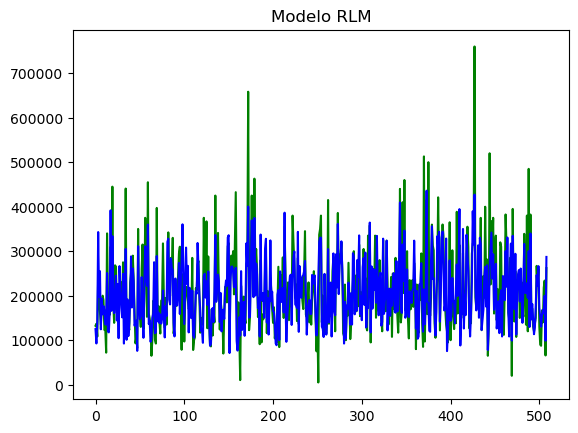

In [878]:
plt.title('Modelo RLM')
plt.plot(y_test, color='green')
plt.plot(y_pred_test, color='blue')
plt.show

### Analisis de las diferencias entre y_test / y_test_predict 

In [884]:
import seaborn as sn

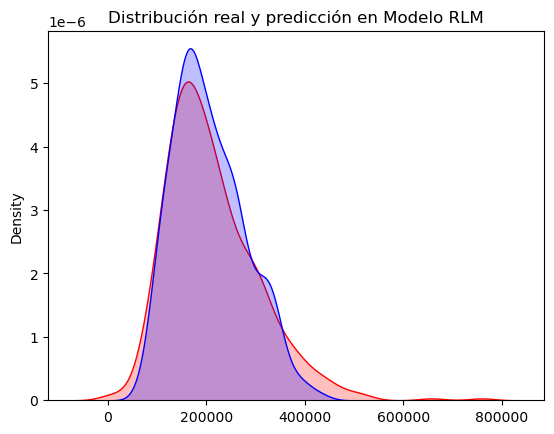

In [957]:
# KDE Plot with seaborn
plt.title('Distribución real y predicción en Modelo RLM')
res = sn.kdeplot(y_test, color='red', shade='True', legend='Distribución real')
res2 = sn.kdeplot(y_pred_test, color='blue', shade='False', legend='Distribución predicción')
plt.show()

In [907]:
Diferencias_RLM=np.round(y_test-y_pred_test)

In [910]:
Diferencias_RLM=Diferencias_RLM.astype(int)

<AxesSubplot:ylabel='Density'>

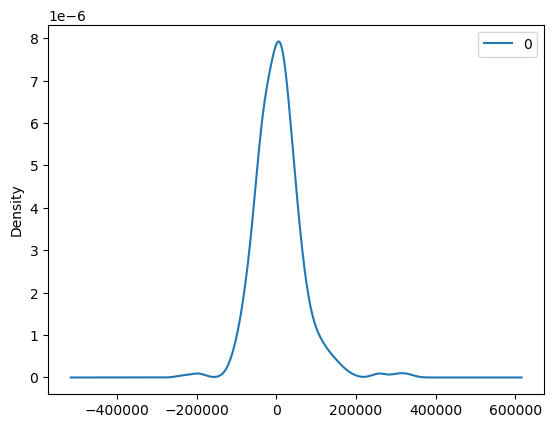

In [953]:
pd.DataFrame(Diferencias_RLM).plot.kde()

<AxesSubplot:>

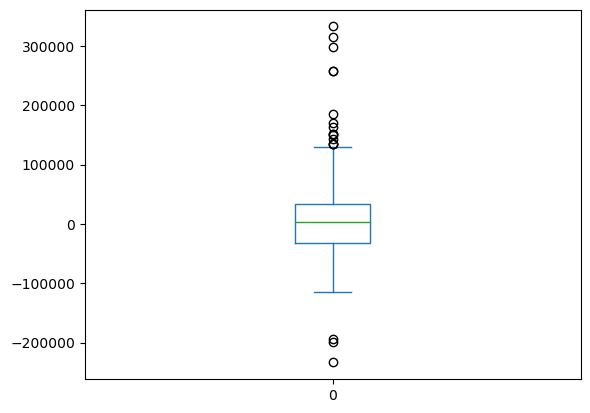

In [916]:
pd.DataFrame(Diferencias_RLM).plot.box()

In [377]:
#y_test.reshape(509,1)

In [381]:
df_aux[['precio','valorTerreno','m2Util','numServi', 'numHabita', 'numDormi','numChime']].corr()

,precio,valorTerreno,m2Util,numServi,numHabita,numDormi,numChime
precio,1.000000,0.547177,0.686094,0.578442,0.504584,0.389793,0.330675
valorTerreno,0.547177,1.000000,0.403979,0.288125,0.287394,0.236983,0.196432
m2Util,0.686094,0.403979,1.000000,0.701440,0.722019,0.656820,0.434603
numServi,0.578442,0.288125,0.701440,1.000000,0.490812,0.443441,0.416429
numHabita,0.504584,0.287394,0.722019,0.490812,1.000000,0.667725,0.293010
numDormi,0.389793,0.236983,0.656820,0.443441,0.667725,1.000000,0.259099
numChime,0.330675,0.196432,0.434603,0.416429,0.293010,0.259099,1.000000


In [382]:
df[['precio','valorTerreno','m2Util','numServi', 'numHabita', 'numDormi','numChime']].corr()

,precio,valorTerreno,m2Util,numServi,numHabita,numDormi,numChime
precio,1.000000,0.581266,0.712390,0.597250,0.531170,0.400349,0.376786
valorTerreno,0.581266,1.000000,0.423441,0.297498,0.298865,0.202449,0.211727
m2Util,0.712390,0.423441,1.000000,0.718564,0.733666,0.656196,0.473788
numServi,0.597250,0.297498,0.718564,1.000000,0.517585,0.458033,0.436234
numHabita,0.531170,0.298865,0.733666,0.517585,1.000000,0.671863,0.319894
numDormi,0.400349,0.202449,0.656196,0.458033,0.671863,1.000000,0.284475
numChime,0.376786,0.211727,0.473788,0.436234,0.319894,0.284475,1.000000


In [385]:
df[['precio','valorTerreno','m2Util','numServi', 'numHabita', 'numDormi','numChime']].head(3)

,precio,valorTerreno,m2Util,numServi,numHabita,numDormi,numChime
0,132500,50000,906,10,5,2,1
1,181115,22300,1953,25,6,3,0
2,109000,7300,1944,10,8,4,1


In [383]:
df.shape

(1728, 16)

### CASO 2

In [392]:
# Vamos con el df original y las variables que tienen correlacion con precio. Sin quitar ni tratar outliers.
# 'valorTerreno', 'm2Util', 'numServi', 'numHabita', 'numDormi','numChime' (las ultimas dos no tienen mucha pero las incluyo igual)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   precio        1728 non-null   int64 
 1   m2Brutos      1728 non-null   int64 
 2   edad          1728 non-null   int64 
 3   valorTerreno  1728 non-null   int64 
 4   m2Util        1728 non-null   int64 
 5   perUni        1728 non-null   int64 
 6   numDormi      1728 non-null   int64 
 7   numChime      1728 non-null   int64 
 8   numServi      1728 non-null   int64 
 9   numHabita     1728 non-null   int64 
 10  calefaccion   1728 non-null   object
 11  alimentacion  1728 non-null   object
 12  tipoDesague   1728 non-null   object
 13  conVistas     1728 non-null   object
 14  construccion  1728 non-null   object
 15  aire          1728 non-null   object
dtypes: int64(10), object(6)
memory usage: 216.1+ KB


In [ ]:
# las variables que voy a usar ya son enteras

### Separacion de variable objetivo y variables independientes

In [393]:
df.columns # 3,4,8,9,6,7

Index(['precio', 'm2Brutos', 'edad', 'valorTerreno', 'm2Util', 'perUni',
       'numDormi', 'numChime', 'numServi', 'numHabita', 'calefaccion',
       'alimentacion', 'tipoDesague', 'conVistas', 'construccion', 'aire'],
      dtype='object')

In [394]:
df.iloc[:,[3,4,8,9,6,7]].columns # serán estas

Index(['valorTerreno', 'm2Util', 'numServi', 'numHabita', 'numDormi',
       'numChime'],
      dtype='object')

In [469]:
x2=df.iloc[:,[3,4,8,9,6,7]].values

In [470]:
y2=df.iloc[:,0].values

In [471]:
df.iloc[:,[3,4,8,9,6,7]].head(1)

,valorTerreno,m2Util,numServi,numHabita,numDormi,numChime
0,50000,906,10,5,2,1


In [472]:
x2[0] 

array([50000,   906,    10,     5,     2,     1], dtype=int64)

In [473]:
df.iloc[:,0].head(1)

0    132500
Name: precio, dtype: int64

In [474]:
y2[0]

132500

### Division train-test

In [269]:
from sklearn.model_selection import train_test_split

In [475]:
x2_train,x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.30 , random_state = 1987) 

In [476]:
x2_train.shape, y2_train.shape, # 5 son las columnas

((1209, 6), (1209,))

In [477]:
x2_test.shape, y2_test.shape

((519, 6), (519,))

In [478]:
x2[0]

array([50000,   906,    10,     5,     2,     1], dtype=int64)

In [479]:
x2_train[0]

array([49800,  2816,    25,    12,     4,     1], dtype=int64)

In [480]:
x2_test[0]

array([108900,   2680,     25,     11,      4,      1], dtype=int64)

In [481]:
len(x2), len(x2_test), len(x2_train)

(1728, 519, 1209)

In [ ]:
# El primer array de x2 no es primer array ni de train, ni de test.

In [491]:
x2_train[106] # esta en train pero no sale primero

array([50000,   906,    10,     5,     2,     1], dtype=int64)

In [485]:
np.where(x2_train == 50000) ## para buscar el array de x2 (el primero)

(array([  22,  106,  294,  498,  512,  609, 1120], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0], dtype=int64))

### Modelado RLM 2

In [274]:
from sklearn.linear_model import LinearRegression

In [445]:
regresion2 = LinearRegression()

In [492]:
regresion2.fit(x2_train, y2_train)

LinearRegression()

In [493]:
y2_pred=regresion2.predict(x2_test)

### Iteracion del modelo 2

In [278]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [557]:
x2 = np.append(arr=np.ones((df.shape[0],1)).astype(int), values=x2, axis=1 )
                  # matriz de filas totales X una columna que se agregan al comienzo de x
x2[0]
# ones, 'valorTerreno', 'm2Util', 'numChime', 'numServi', 'numHabita','conVistas', 'construccion', 'aire', 'Dormi3', 
#'DormiDesde4', 'calef_elec', 'calef_aero', 'alim_elec', 'alim_gas', 'des_comuni'

array([    1,     1, 50000,   906,    10,     5,     2,     1],
      dtype=int64)

In [332]:
# significacion=0.05 # umbral del p-valor

In [558]:
x2_optimo=x2[:,[0,1,2,3,4,5,6]]   

# En primer lugar ponemos todas las variables. 
# Luego vamos quitando la de mayor p-valor, hasta p-valor <= significacion (0,05)

In [560]:
regresion_ols=sm.OLS(endog=y2, exog=x2_optimo).fit()
regresion_ols.summary()   # P es el p-valor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     569.7
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:48:18   Log-Likelihood:                -21475.
No. Observations:                1728   AIC:                         4.296e+04
Df Residuals:                    1722   BIC:                         4.300e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8497.9641   3085.482      2.754      0.006    2446.276    1.45e+04
x1          8497.9641   3085.482      2.754      0.006    2446.276    1.45e+04
x2             0.9408      0.046     20.365      0.000       0.850       1.031
x3            71.6877      4.622     15.511      0.000      62.623      80.752
x4          2690.6922    318.188      8.456      0.000    2066.616    3314.768
x5          2923.7299    996.697      2.933      0.003     968.865    4878.595
x6         -1.112e+04   2559.228     -4.344      0.000   -1.61e+04   -6096.659
==============================================================================
Omnibus:                      574.362   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3770.039
Skew:                           1.395   Prob(JB):                         0.00
Kurtosis:                       9.677   Cond. No.                     2.05e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.99e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### CALCULO DE LA PREDICCION CON LAS VARIABLES RESULTANTES DE LA SELECCION


* Evaluamos el modelo con las variables resultantes:

     ones 'valorTerreno', 'm2Util', 'numServi', 'numHabita', 'numDormi'

In [499]:
x2[:,[1,2,3,4,5]][0] # quito la 0 que es la de ones
'valorTerreno', 'm2Util', 'numServi', 'numHabita', 'numDormi'

array([50000,   906,    10,     5,     2], dtype=int64)

In [500]:
df[(df['valorTerreno']==50000) & (df['m2Util']==906)][['valorTerreno', 'm2Util', 'numServi', 'numHabita', 'numDormi']]

,valorTerreno,m2Util,numServi,numHabita,numDormi
0,50000,906,10,5,2


In [513]:
x2_train[0]#[0,1,2,3,4,5]
#'valorTerreno', 'm2Util', 'numServi', 'numHabita', 'numDormi','numChime'
# tengo que quitar la ultima que se excluyo del modelo
x2_train[[0],[0,1,2,3,4]]

array([49800,  2816,    25,    12,     4], dtype=int64)

In [514]:
regresion_auto=LinearRegression() 
regresion_auto.fit(x2_train[:,[0,1,2,3,4]],y2_train) ## esto siempre calculado con el lote de entrenamiento 

LinearRegression()

In [515]:
y2_pred_test=regresion_auto.predict(x2_test[:,[0,1,2,3,4]])

* Evaluamos el modelo en x_train, y_train

In [516]:
r2_score(y2_train, regresion_auto.predict(x2_train[:,[0,1,2,3,4]]))

0.6361404508911868

* Evaluamos el modelo con las variables predictoras en x_test, y_test

In [517]:
r2_score(y2_test, regresion_auto.predict(x2_test[:,[0,1,2,3,4]]))

0.5875044077084751

### CASO 2.1 Dejo solo m2Util, valorTerreno, numServi

In [518]:
df.corr()

,precio,m2Brutos,edad,valorTerreno,m2Util,perUni,numDormi,numChime,numServi,numHabita
precio,1.000000,0.116191,-0.188793,0.581266,0.712390,0.200119,0.400349,0.376786,0.597250,0.531170
m2Brutos,0.116191,1.000000,-0.044326,0.045121,0.136701,-0.022302,0.107339,0.105514,0.078347,0.105812
edad,-0.188793,-0.044326,1.000000,-0.021818,-0.174242,-0.037785,0.027125,-0.172022,-0.361897,-0.082264
valorTerreno,0.581266,0.045121,-0.021818,1.000000,0.423441,0.228427,0.202449,0.211727,0.297498,0.298865
m2Util,0.712390,0.136701,-0.174242,0.423441,1.000000,0.209981,0.656196,0.473788,0.718564,0.733666
perUni,0.200119,-0.022302,-0.037785,0.228427,0.209981,1.000000,0.162919,0.246626,0.179541,0.157068
numDormi,0.400349,0.107339,0.027125,0.202449,0.656196,0.162919,1.000000,0.284475,0.458033,0.671863
numChime,0.376786,0.105514,-0.172022,0.211727,0.473788,0.246626,0.284475,1.000000,0.436234,0.319894
numServi,0.597250,0.078347,-0.361897,0.297498,0.718564,0.179541,0.458033,0.436234,1.000000,0.517585
numHabita,0.531170,0.105812,-0.082264,0.298865,0.733666,0.157068,0.671863,0.319894,0.517585,1.000000


### Separacion de variable objetivo y variables independientes

In [393]:
df.columns # m2Util, valorTerreno, numServi 
            4, 3, 8

Index(['precio', 'm2Brutos', 'edad', 'valorTerreno', 'm2Util', 'perUni',
       'numDormi', 'numChime', 'numServi', 'numHabita', 'calefaccion',
       'alimentacion', 'tipoDesague', 'conVistas', 'construccion', 'aire'],
      dtype='object')

In [526]:
df.iloc[:,[4, 3, 8]].columns # serán estas 3

Index(['m2Util', 'valorTerreno', 'numServi'], dtype='object')

In [562]:
x21=df.iloc[:,[4, 3, 8]].values

In [563]:
y21=df.iloc[:,0].values

In [529]:
df.iloc[:,[4, 3, 8]].head(1)

,m2Util,valorTerreno,numServi
0,906,50000,10


In [564]:
x21[0] 

array([  906, 50000,    10], dtype=int64)

In [565]:
df.iloc[:,0].head(1)

0    132500
Name: precio, dtype: int64

In [566]:
y21[0]

132500

### Division train-test

In [269]:
from sklearn.model_selection import train_test_split

In [567]:
x21_train,x21_test, y21_train, y21_test = train_test_split(x21, y21, test_size = 0.30 , random_state = 1987) 

In [568]:
x21_train.shape, y21_train.shape, # 5 son las columnas

((1209, 3), (1209,))

In [569]:
x21_test.shape, y21_test.shape

((519, 3), (519,))

In [570]:
x21[0]

array([  906, 50000,    10], dtype=int64)

In [537]:
x21_train[0]

array([ 2816, 49800,    25], dtype=int64)

In [571]:
x21_test[0]

array([  2680, 108900,     25], dtype=int64)

In [572]:
len(x21), len(x21_test), len(x21_train)

(1728, 519, 1209)

In [ ]:
# El primer array de x2 no es primer array ni de train, ni de test.

In [573]:
x21_train[512] # esta en train pero no sale primero

array([  960, 50000,    10], dtype=int64)

In [547]:
np.where(x21_train == 50000) ## para buscar el array de x2 (el primero)

(array([  22,  106,  294,  498,  512,  609, 1120], dtype=int64),
 array([1, 1, 1, 1, 1, 1, 1], dtype=int64))

### Modelado RLM 2

In [274]:
from sklearn.linear_model import LinearRegression

In [574]:
regresion21 = LinearRegression()

In [575]:
regresion21.fit(x21_train, y21_train)

LinearRegression()

In [576]:
y21_pred=regresion21.predict(x21_test)

### Iteracion del modelo 2.1

In [278]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [577]:
x21 = np.append(arr=np.ones((df.shape[0],1)).astype(int), values=x21, axis=1 )
                  # matriz de filas totales X una columna que se agregan al comienzo de x
x21[0]
#

array([    1,   906, 50000,    10], dtype=int64)

In [332]:
# significacion=0.05 # umbral del p-valor

In [578]:
x21_optimo=x21[:,[0,1,2,3]]   

# En primer lugar ponemos todas las variables. 
# Luego vamos quitando la de mayor p-valor, hasta p-valor <= significacion (0,05)

In [579]:
regresion_ols=sm.OLS(endog=y21, exog=x21_optimo).fit()
regresion_ols.summary()   # P es el p-valor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     932.3
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:53:11   Log-Likelihood:                -21486.
No. Observations:                1728   AIC:                         4.298e+04
Df Residuals:                    1724   BIC:                         4.300e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5375.7832   4758.492      1.130      0.259   -3957.242    1.47e+04
x1            69.4314      3.579     19.400      0.000      62.412      76.451
x2             0.9619      0.046     20.842      0.000       0.871       1.052
x3          2710.3207    319.789      8.475      0.000    2083.105    3337.536
==============================================================================
Omnibus:                      592.167   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3869.998
Skew:                           1.447   Prob(JB):                         0.00
Kurtosis:                       9.736   Cond. No.                     1.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### CALCULO DE LA PREDICCION CON LAS VARIABLES RESULTANTES DE LA SELECCION


* Evaluamos el modelo con las variables resultantes:

     ones m2Util, valorTerreno, numServi 

In [588]:
x21[:,[1,2,3]] # quito la 0 que es ones 

array([[  906, 50000,    10],
       [ 1953, 22300,    25],
       [ 1944,  7300,    10],
       ...,
       [ 1099, 20400,    10],
       [ 1225, 16800,    10],
       [ 1959, 26000,    10]], dtype=int64)

In [590]:
df[(df['valorTerreno']==50000) & (df['m2Util']==906)][['m2Util', 'valorTerreno', 'numServi']]

,m2Util,valorTerreno,numServi
0,906,50000,10


In [593]:
x21_train[0]#[0,1,2,3,4,5]
#'m2Util', valorTerreno', 'numServi'
# no quito ninguna 

array([ 2816, 49800,    25], dtype=int64)

In [594]:
regresion_auto=LinearRegression()  # todas las columnas porque no quite ninguna en este modelado
regresion_auto.fit(x21_train[:,[0,1,2]],y21_train) ## esto siempre calculado con el lote de entrenamiento 

LinearRegression()

In [595]:
y21_pred_test=regresion_auto.predict(x21_test[:,[0,1,2]])

* Evaluamos el modelo en x_train, y_train

In [596]:
r2_score(y21_train, regresion_auto.predict(x21_train[:,[0,1,2]]))

0.6305371381000464

* Evaluamos el modelo con las variables predictoras en x_test, y_test

In [597]:
r2_score(y21_test, regresion_auto.predict(x21_test[:,[0,1,2]]))

0.5861898020621653

In [ ]:
### DA LO MISMO QUE EL MODELO 2.

### CASO 3 RLS con la variable m2Util (corr .71) y los datos originales

In [598]:
df.head(2)

,precio,m2Brutos,edad,valorTerreno,m2Util,perUni,numDormi,numChime,numServi,numHabita,calefaccion,alimentacion,tipoDesague,conVistas,construccion,aire
0,132500,9,42,50000,906,35,2,1,10,5,Electrica,Electrica,fosa septica,No,No,No
1,181115,92,0,22300,1953,51,3,0,25,6,suelo radiante,gas,fosa septica,No,No,No


In [600]:
x3=df.iloc[:,4].values
y3=df.iloc[:,0].values

In [601]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.3, random_state=1987)

In [607]:
len(x3_train)

1209

In [608]:
len(x3_test)

519

In [609]:
len(y3_train)

1209

In [610]:
len(y3_test)

519

#### Creacion del modelo

In [612]:
regresion=LinearRegression()
regresion.fit(x3_train.reshape(-1,1),y3_train.reshape(-1,1))

LinearRegression()

Prediccion

In [613]:
y3_pred=regresion.predict(x3_test.reshape(-1,1))

In [617]:
y3_pred.size

519

In [616]:
y3_test.size

519

#### Evaluación del modelo

##### R cuadrado o coheficiente de determinacion
 
Refleja la bondad del ajuste de un modelo a la variable que pretender explicar.

Sera un valor entre -1 (en relaciones inversamente proporcionales) y 1 (en relaciones directamente proporcionales)

Cuando mas aproxime R^2 a 1 o -1 mejor será el modelo

In [35]:
from sklearn.metrics import r2_score

Primero lo vemos sobre los datos de entrenamiento

In [618]:
# coef R2
r2_score(y3_train.reshape(-1,1), regresion.predict(x3_train.reshape(-1,1)))

0.5014601095474118

In [619]:
r2_score(y3_test.reshape(-1,1), regresion.predict(x3_test.reshape(-1,1)))

0.5200441827088677

In [40]:
## no deberia dar mejor en test que en training
# Baja bastante. Aunque la correlacion con la variable es de 0.71, no predice a 0.71, sino a 0.50/0.52 

array([ 39343.,  64445.,  98273.,  37731., 105582.,  56642.,  91738.,
        46205.,  57189.,  55794., 112635.,  39891.,  93940.,  66029.,
        81363.,  83088., 113812.,  54445., 116969.,  60150.,  63218.,
        43525.,  61111.,  56957.])

<function matplotlib.pyplot.show(close=None, block=None)>

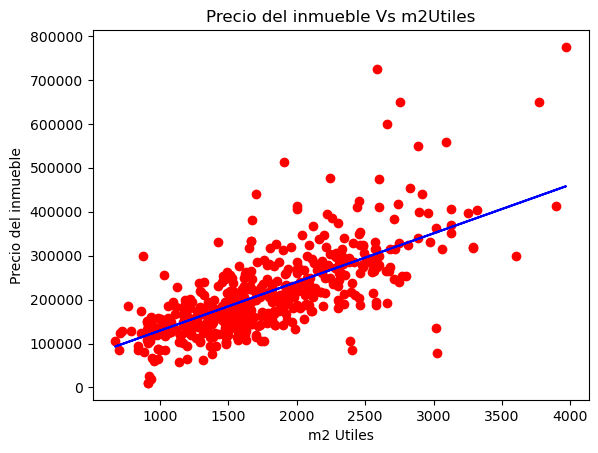

In [621]:
plt.title('Precio del inmueble Vs m2Utiles')
plt.xlabel('m2 Utiles')
plt.ylabel('Precio del inmueble')
plt.scatter(x3_test, y3_test, color='red')
plt.plot(x3_test, regresion.predict(x3_test.reshape(-1,1)), color='blue')
plt.show

### CASO 3.1 RLS con la variable m2Util (corr .71) y los datos tratados outliers, etc.

In [622]:
df_aux.head(2)

,precio,valorTerreno,m2Util,numDormi,numChime,numServi,numHabita,calefaccion,alimentacion,tipoDesague,conVistas,construccion,aire,Dormi3,DormiDesde4,calef_elec,calef_aero,alim_elec,alim_gas,des_comuni
0,132500,50000,906,2,1,10,5,Electrica,Electrica,fosa septica,0,0,0,0,0,1,0,1,0,0
1,181115,22300,1953,3,0,25,6,suelo radiante,gas,fosa septica,0,0,0,1,0,0,0,0,1,0


In [635]:
x31=df_aux.iloc[:,2].values
y31=df_aux.iloc[:,0].values

In [636]:
x31_train, x31_test, y31_train, y31_test = train_test_split(x31,y31,test_size=0.3, random_state=1987)

In [637]:
len(x31_train)

1186

In [638]:
len(x31_test)

509

In [639]:
len(y31_train)

1186

In [640]:
len(y31_test)

509

#### Creacion del modelo

In [641]:
regresion=LinearRegression()
regresion.fit(x31_train.reshape(-1,1),y31_train.reshape(-1,1))

LinearRegression()

Prediccion

In [642]:
y31_pred=regresion.predict(x31_test.reshape(-1,1))

In [643]:
y31_pred.size

509

In [644]:
y31_test.size

509

#### Evaluación del modelo

##### R cuadrado o coheficiente de determinacion
 
Refleja la bondad del ajuste de un modelo a la variable que pretender explicar.

Sera un valor entre -1 (en relaciones inversamente proporcionales) y 1 (en relaciones directamente proporcionales)

Cuando mas aproxime R^2 a 1 o -1 mejor será el modelo

In [645]:
from sklearn.metrics import r2_score

Primero lo vemos sobre los datos de entrenamiento

In [646]:
# coef R2
r2_score(y31_train.reshape(-1,1), regresion.predict(x31_train.reshape(-1,1)))

0.4719368080593751

In [647]:
r2_score(y31_test.reshape(-1,1), regresion.predict(x31_test.reshape(-1,1)))

0.4653014351746648

In [40]:
## Aun peor.

<function matplotlib.pyplot.show(close=None, block=None)>

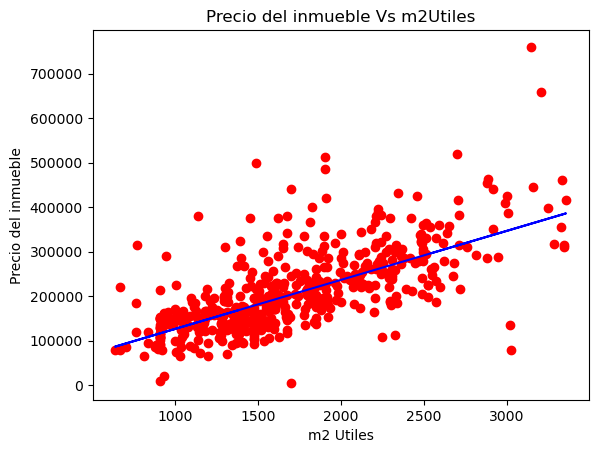

In [648]:
plt.title('Precio del inmueble Vs m2Utiles')
plt.xlabel('m2 Utiles')
plt.ylabel('Precio del inmueble')
plt.scatter(x31_test, y31_test, color='red')
plt.plot(x31_test, regresion.predict(x31_test.reshape(-1,1)), color='blue')
plt.show

## PRUEBAS CON EL RESTO DE MODELOS, CON LOS DATOS DE DF_AUX Y CON LAS VARIABLES 'm2Util','valorTerreno','numServi','numHabita'

### Prueba de distintos SVR 

In [655]:
df_aux[['m2Util','valorTerreno','numServi','numHabita']].head()

In [659]:
df_aux.head(1)

,precio,valorTerreno,m2Util,numDormi,numChime,numServi,numHabita,calefaccion,alimentacion,tipoDesague,conVistas,construccion,aire,Dormi3,DormiDesde4,calef_elec,calef_aero,alim_elec,alim_gas,des_comuni
0,132500,50000,906,2,1,10,5,Electrica,Electrica,fosa septica,0,0,0,0,0,1,0,1,0,0


### Separar predictoras y objetivo

In [673]:
x4=df_aux.iloc[:,[1,2,5,6]].values # [[]] para que sea un array de arrays o sea matriz y luego no tenga que hacer el reshape en los modelos
y4=df_aux.iloc[:,[0]].values

### Division train-test

In [269]:
from sklearn.model_selection import train_test_split

In [674]:
x4_train,x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.30 , random_state = 1987) 

In [675]:
len(x4_train),len(x4_test), len(y4_train), len(y4_test)

(1186, 509, 1186, 509)

#### Normalizacion / estandarizacion

* En este tipo de modelo si que es necesario normalizar. Se hace despues de separar training y test.

In [661]:
from sklearn.preprocessing import StandardScaler

* Una transformacion para cada variable (en este caso x,y)

In [676]:
sc_x=StandardScaler()
x4_train=sc_x.fit_transform(x4_train)
x4_train

array([[-4.44156636e-01,  1.12945050e+00, -1.41814033e+00,
        -4.34407414e-01],
       [ 1.09039398e-01, -4.86233475e-01,  1.64093377e-01,
        -7.31325613e-04],
       [-6.98448362e-01, -8.02796824e-01, -1.41814033e+00,
        -7.31325613e-04],
       ...,
       [-1.94326169e-01, -9.65403134e-01,  1.64093377e-01,
         4.32944763e-01],
       [ 3.99021190e-01, -1.33905168e+00, -1.41814033e+00,
        -4.34407414e-01],
       [-5.15536770e-01, -7.47441484e-01, -6.27023475e-01,
        -1.30175959e+00]])

In [677]:
sc_y=StandardScaler()
y4_train=sc_y.fit_transform(y4_train)
y4_train

array([[-1.08433004],
       [-0.02092717],
       [-1.15443266],
       ...,
       [-0.34555624],
       [-1.20835775],
       [-0.31320118]])

#### Creacion del modelo

Pruebo con los distintos kernels

In [664]:
from sklearn.svm import SVR # de Super vector machine importamos Super vertor regression

Opciones de kernel de SVR 

- linear (para modelos lineales)
- poly (para modelos polinomicos)
- rbf (radial basic function o gaussiano para modelos radiales)
- sigmoid (sigmoidal para modelos sigmoides)
- precomputed (no es usado para ML convencional)

Otros parametros

- degree :  para indicar el grado del polinomio en kernel poly (por defecto 3)
- gamma: para darle escalado al sigmoide, rbf o poly (por defecto auto escalado)

In [678]:
reg_svr_klineal=SVR(kernel='linear')
reg_svr_klineal.fit(x4_train,y4_train.ravel())  # la advertencia es para el modelo lineal quiere un array 1D. Le agregue ravel para 1D

SVR(kernel='linear')

In [679]:
reg_svr_kpoly=SVR(kernel='poly')
reg_svr_kpoly.fit(x4_train,y4_train.ravel())  

SVR(kernel='poly')

In [680]:
reg_svr_kgauss=SVR(kernel='rbf')  # 
reg_svr_kgauss.fit(x4_train,y4_train.ravel())  

SVR()

In [681]:
reg_svr_ksigmoide=SVR(kernel='sigmoid')
reg_svr_ksigmoide.fit(x4_train,y4_train.ravel())  

SVR(kernel='sigmoid')

#### Prediccion

RECORDAR QUE APLICAMOS LA ESTANDARIZACION!!! 

* Para transformar fit.transform 
* Para volver fit.inverse



In [686]:
y_svr_klineal=reg_svr_klineal.predict(sc_x.fit_transform( x4_test ) )  # Transformar antes de pasar el valor y debe ser array de array
sc_y.inverse_transform(  [y_svr_klineal]  )                            A# hay que hacer la inversa de la transformacion en 'y' para volver al rango de valores original

array([[128606.3413085 ,  97200.8163758 , 140586.53429094,
        320711.13506757, 194126.27238268, 234824.09849815,
        131213.28812143, 189764.74578377, 160434.51240928,
        157097.29221096, 171815.86097398, 137370.74853727,
        138435.65083472, 251657.64419174, 126613.45297236,
        118339.56088105, 165427.91892097, 380945.48226269,
        163485.61975346, 312380.82202359, 211304.22975415,
        154419.01625461, 185843.67919713, 235264.18832778,
        145820.81620241, 218728.08879181, 110596.31992588,
        241567.95924093, 187341.1879989 , 171554.07281287,
        146128.38948824, 233343.59268575, 108530.34778551,
        170225.60277846, 281804.4828256 , 112912.64337562,
        187275.5229423 , 110978.32351147, 140941.00985334,
        180592.61980361, 272897.34669726, 171339.39523559,
        119246.58915269, 220935.15402604, 154549.20352626,
        142643.95255716, 140484.3329147 ,  94050.69358414,
        279464.07264677, 197413.44504764, 154251.1677964

In [688]:
y_svr_kpoly=reg_svr_kpoly.predict(sc_x.fit_transform(x4_test))
sc_y.inverse_transform( [y_svr_kpoly] )

array([[136940.69787992, 106707.1124777 , 121909.33161484,
        277537.26321452, 179690.4195841 , 210059.42377114,
        132459.2906291 , 168642.61163759, 136157.71552892,
        177114.36475981, 178002.83488024, 120175.19549834,
        166750.26855154, 231737.78721615, 132399.95447548,
        149717.97861702, 167507.43380038, 553734.03313453,
        171783.58240613, 438635.71691814, 190353.23422709,
        181118.83933816, 179923.78501122, 210146.80362725,
        165135.34037804, 188670.11645256, 132660.40059366,
        268338.54220867, 183309.45895459, 157480.73249307,
        152137.14846345, 190643.39346979, 121389.63853991,
        154002.99014115, 327383.01122871, 130480.1023401 ,
        183625.27478126, 146179.60759089, 153128.10752652,
        178313.90410832, 203350.97039871, 172761.73102901,
        148664.29724379, 193348.72494551, 122347.59848627,
        159840.91987328, 169415.41417262, 106103.1180079 ,
        291220.70539193, 193149.21385405, 177501.1290676

In [690]:
y_svr_kgauss=reg_svr_kgauss.predict(sc_x.fit_transform(x4_test))
sc_y.inverse_transform( [y_svr_kgauss] )  

array([[130946.81409812, 118030.21947839, 137128.44435609,
        344457.25837905, 213715.7910339 , 214791.16574262,
        143999.68549062, 163159.48039565, 148358.05124314,
        157772.16077775, 172074.21705891, 139408.55097787,
        149955.19444995, 267583.19557187, 141000.16299158,
        135985.0628559 , 162766.90408686, 391448.87796918,
        157536.73951973, 324669.2951818 , 185705.20517498,
        155578.74168825, 186811.23304484, 245592.41306421,
        143751.13187395, 189670.65150253, 120717.55119642,
        243974.70231692, 189823.56658588, 151242.84407427,
        143749.28011327, 222793.49642052, 125631.59473241,
        153062.45672699, 346586.9576406 , 121390.89601104,
        188404.08101036, 129435.33697161, 129098.4670965 ,
        174412.76335651, 265990.17989953, 159531.3089743 ,
        136877.19472439, 219518.63013919, 154628.66951805,
        135201.38285318, 151697.75069405, 115742.1089973 ,
        323955.63060255, 198441.5187161 , 154503.8529042

In [691]:
y_svr_ksigmoide=reg_svr_ksigmoide.predict(sc_x.fit_transform(x4_test))
sc_y.inverse_transform( [y_svr_ksigmoide] ) 

array([[  -373786.03785106,   7399957.68623149,    271533.16539433,
         -5634959.99064068,   2294275.26149444,   2319621.11441161,
          3666355.38575776,   1190912.37470708,  -1152458.21276582,
          -476760.2826252 ,   -966408.14525479,  -1410064.55536048,
           281321.98395456,   1356722.73601134,   4305028.18180257,
          3918835.30287053,   -260141.43509285, -12897400.14823311,
          -640448.99451757,  -3204690.75929142,   -240960.50424251,
          -890200.35541849,   -769637.54248448,   2190669.41551191,
         -1524517.43753712,   1675259.5506533 ,    859336.47211775,
          3280554.67969398,   -517030.85454845,  -1498284.42196601,
         -1770087.15772285,   2512941.23864434,   6067098.00183244,
          -417531.45921293,   -322122.14503303,    862187.02946836,
            19693.64782661,   4683525.40687085,   -299221.61014385,
           870191.05726249,   -292694.53509208,  -1568057.2254072 ,
          3765326.43118193,   2382940.07580974, 

#### Evaluacion de los modelos



In [692]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

En el calculo de los estadisticos no hace falta transformar. Hacemos la prediccion directamente sobre x

NOTA: En estos ejemplos no estan corregidos los mae y mse. Habria que transformar las variables.

El R2 da bien aunque no se transforme ni se haga la inversa de la transformacion.

* Kernel lineal 

In [ ]:
## tuve que hacer un reshape para que quedara como el y4_test

In [705]:
r2_klineal=r2_score(y4_test, sc_y.inverse_transform(  [y_svr_klineal]  ).reshape(509,1) ) 
mae_klineal=mean_absolute_error(y4_test, sc_y.inverse_transform(  [y_svr_klineal]  ).reshape(509,1))
mse_klineal=mean_squared_error(y4_test, sc_y.inverse_transform(  [y_svr_klineal]  ).reshape(509,1))
print(f'Estadisticos de la SVR con kernel lineal\n r2: {r2_klineal:.2f} \n mae: {mae_klineal:.2f} \n mse: {mse_klineal:.2f}')


Estadisticos de la SVR con kernel lineal
 r2: 0.54 
 mae: 43541.42 
 mse: 4056493690.01


* Kernel polinomico

In [707]:
r2_kpoly=r2_score(y4_test, sc_y.inverse_transform(  [y_svr_kpoly]  ).reshape(509,1) ) 
mae_kpoly=mean_absolute_error(y4_test, sc_y.inverse_transform(  [y_svr_kpoly]  ).reshape(509,1)  )
mse_kpoly=mean_squared_error(y4_test, sc_y.inverse_transform(  [y_svr_kpoly]  ).reshape(509,1)   )
print(f'Estadisticos de la SVR con kernel polinomico\n r2: {r2_kpoly:.2f} \n mae: {mae_kpoly:.2f} \n mse: {mse_kpoly:.2f}')


Estadisticos de la SVR con kernel polinomico
 r2: 0.46 
 mae: 48327.49 
 mse: 4687780814.87


* Kernel Gaussiano o radial (rbf)

In [708]:
r2_kgauss=r2_score(y4_test, sc_y.inverse_transform(  [y_svr_kgauss]  ).reshape(509,1)  ) 
mae_kgauss=mean_absolute_error(y4_test, sc_y.inverse_transform(  [y_svr_kgauss]  ).reshape(509,1))
mse_kgauss=mean_squared_error(y4_test, sc_y.inverse_transform(  [y_svr_kgauss]  ).reshape(509,1))
print(f'Estadisticos de la SVR con kernel radial\n r2: {r2_kgauss:.2f} \n mae: {mae_kgauss:.2f} \n mse: {mse_kgauss:.2f}')


Estadisticos de la SVR con kernel radial
 r2: 0.54 
 mae: 43672.20 
 mse: 4022182778.11


* Kernel Sigmoide

In [709]:
r2_ksigm=r2_score(y4_test, sc_y.inverse_transform(  [y_svr_ksigmoide]  ).reshape(509,1) ) 
mae_ksigm=mean_absolute_error(y4_test, sc_y.inverse_transform(  [y_svr_ksigmoide]  ).reshape(509,1))
mse_ksigm=mean_squared_error(y4_test, sc_y.inverse_transform(  [y_svr_ksigmoide]  ).reshape(509,1))
print(f'Estadisticos de la SVR con kernel Sigmoide\n r2: {r2_ksigm:.2f} \n mae: {mae_ksigm:.2f} \n mse: {mse_ksigm:.2f}')
# Esto da muy mal

Estadisticos de la SVR con kernel Sigmoide
 r2: -981.08 
 mae: 1992998.92 
 mse: 8595493940954.64


* Este ultimo da muy mala aproximacion 

<function matplotlib.pyplot.show(close=None, block=None)>

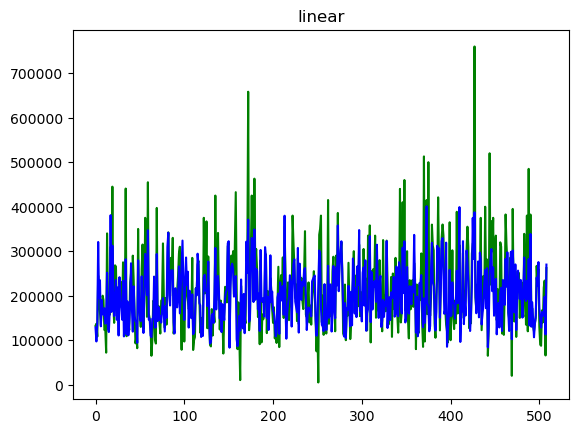

In [726]:
plt.title('linear')
plt.plot(y4_test, color='green')
plt.plot(sc_y.inverse_transform(  [y_svr_klineal]  ).reshape(509,1), color='blue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

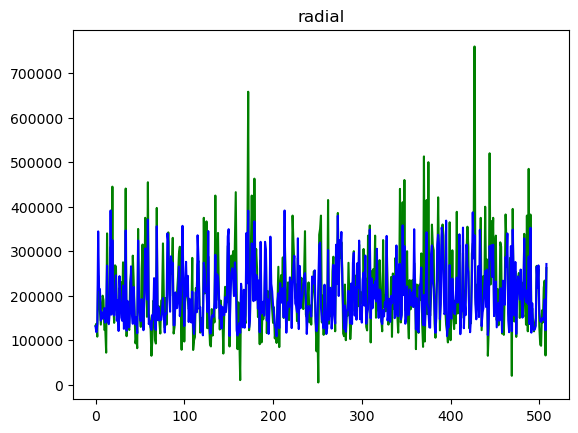

In [730]:
plt.title('radial')
plt.plot(y4_test, color='green')
plt.plot(sc_y.inverse_transform(  [y_svr_kgauss]  ).reshape(509,1), color='blue')
plt.show

###  ARBOL DE DECISION

In [277]:
# from sklearn.metrics import r2_score

In [ ]:
# Sobre las mismas cuatro varibles que mejor correlacionan con precio para no sobrecargar el modelo.

In [736]:
df_aux[['m2Util','valorTerreno','numServi','numHabita']].head(1)

,m2Util,valorTerreno,numServi,numHabita
0,906,50000,10,5


### Separar predictoras y objetivo

In [731]:
x5=df_aux.iloc[:,[1,2,5,6]].values # [[]] para que sea un array de arrays o sea matriz y luego no tenga que hacer el reshape en los modelos
y5=df_aux.iloc[:,[0]].values

### Division train-test

In [269]:
from sklearn.model_selection import train_test_split

In [732]:
x5_train,x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size = 0.30 , random_state = 1987) 

In [733]:
len(x5_train),len(x5_test), len(y5_train), len(y5_test)

(1186, 509, 1186, 509)

#### Normalizacion / estandarizacion

* En este tipo de modelo si que es necesario normalizar. 
* Se hace despues de separar training y test para que los datos de training no interfieran en los de test.

In [661]:
from sklearn.preprocessing import StandardScaler

* Una transformacion para cada variable (en este caso x,y)

In [734]:
sc_x=StandardScaler()
x5_train=sc_x.fit_transform(x5_train)
x5_train

array([[-4.44156636e-01,  1.12945050e+00, -1.41814033e+00,
        -4.34407414e-01],
       [ 1.09039398e-01, -4.86233475e-01,  1.64093377e-01,
        -7.31325613e-04],
       [-6.98448362e-01, -8.02796824e-01, -1.41814033e+00,
        -7.31325613e-04],
       ...,
       [-1.94326169e-01, -9.65403134e-01,  1.64093377e-01,
         4.32944763e-01],
       [ 3.99021190e-01, -1.33905168e+00, -1.41814033e+00,
        -4.34407414e-01],
       [-5.15536770e-01, -7.47441484e-01, -6.27023475e-01,
        -1.30175959e+00]])

In [735]:
sc_y=StandardScaler()
y5_train=sc_y.fit_transform(y5_train)
y5_train

array([[-1.08433004],
       [-0.02092717],
       [-1.15443266],
       ...,
       [-0.34555624],
       [-1.20835775],
       [-0.31320118]])

#### Crear modelo

In [737]:
from sklearn.tree import DecisionTreeRegressor

R2 para distintos criterion

                'squared_error' .24
                'friedman_mse' .25, con min_samples_split=5 .31, min_samples_split=10 .40, max_leaf_nodes=100
                'absolute_error' .15

In [772]:
reg_arbol=DecisionTreeRegressor(criterion='squared_error', min_samples_split=15, max_leaf_nodes=200, random_state=1987)
reg_arbol.fit(x5_train,y5_train)

DecisionTreeRegressor(max_leaf_nodes=200, min_samples_split=15,
                      random_state=1987)

#### Prediccion para test

In [773]:
y_arbol=reg_arbol.predict(sc_x.fit_transform(x5_test))
sc_y.inverse_transform([y_arbol])

array([[ 97286.66666667, 141709.71428571, 174277.77777778,
        442436.27272727, 131000.        , 206950.        ,
        165483.33333333, 202246.78571429, 134243.5       ,
        165483.33333333, 134066.66666667, 176753.        ,
        192666.66666667, 320447.72727273, 174277.77777778,
        146466.66666667, 180755.55555556, 491861.5       ,
        180539.        , 454725.        , 189232.5       ,
        168996.        , 205158.33333333, 256775.        ,
        127833.33333333, 182911.53846154, 140174.15384615,
        267079.84615385, 160500.        , 131000.        ,
        176753.        , 238095.91666667, 108058.57142857,
        202246.78571429, 341672.07142857, 112500.        ,
        194366.66666667, 112500.        , 119187.        ,
        170916.66666667, 270147.11111111, 176753.        ,
        146466.66666667, 253166.66666667, 134066.66666667,
        119187.        , 168996.        , 113368.14285714,
        341672.07142857, 173300.        , 132871.4285714

#### Evaluacion del modelo (r2, mae,mse)

In [37]:
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [774]:
r2_arbol=r2_score(y5_test, sc_y.inverse_transform([y_arbol]).reshape(509,1) ) 
mae_arbol=mean_absolute_error(y5_test, sc_y.inverse_transform([y_arbol]).reshape(509,1))
mse_arbol=mean_squared_error(y5_test, sc_y.inverse_transform([y_arbol]).reshape(509,1))
print(f'Estadisticos de la regresion por Arbol de Desicion\n r2: {r2_arbol:.2f} \n mae: {mae_arbol:.2f} \n mse: {mse_arbol:.2f}')


Estadisticos de la regresion por Arbol de Desicion
 r2: 0.41 
 mae: 50776.03 
 mse: 5196328790.50


<function matplotlib.pyplot.show(close=None, block=None)>

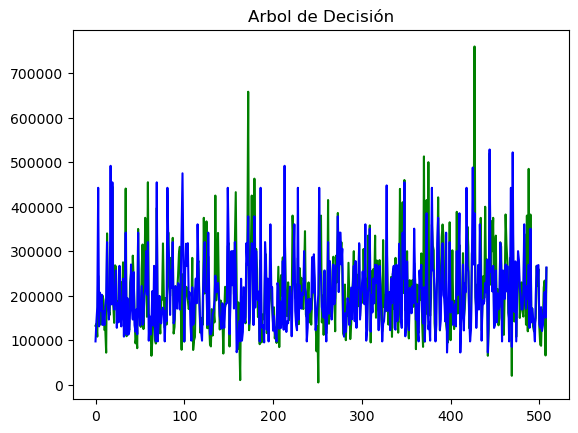

In [816]:
plt.title('Arbol de Decisión')
plt.plot(y5_test, color='green')
plt.plot(sc_y.inverse_transform(  [y_arbol]  ).reshape(509,1), color='blue')
plt.show

## Bosques Aleatorios

In [775]:
# Utilizo mismos datos
df_aux[['m2Util','valorTerreno','numServi','numHabita']].head(1)

,m2Util,valorTerreno,numServi,numHabita
0,906,50000,10,5


### Separar predictoras y objetivo

In [776]:
x6=df_aux.iloc[:,[1,2,5,6]].values # [[]] para que sea un array de arrays o sea matriz y luego no tenga que hacer el reshape en los modelos
y6=df_aux.iloc[:,[0]].values

### Division train-test

In [269]:
from sklearn.model_selection import train_test_split

In [777]:
x6_train,x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size = 0.30 , random_state = 1987) 

In [778]:
len(x6_train),len(x6_test), len(y6_train), len(y6_test)

(1186, 509, 1186, 509)

#### Normalizacion / estandarizacion

* En este tipo de modelo si que es necesario normalizar. 
* Se hace despues de separar training y test para que los datos de training no interfieran en los de test.

In [661]:
from sklearn.preprocessing import StandardScaler

* Una transformacion para cada variable (en este caso x,y)

In [779]:
sc_x=StandardScaler()
x6_train=sc_x.fit_transform(x6_train)
x6_train

array([[-4.44156636e-01,  1.12945050e+00, -1.41814033e+00,
        -4.34407414e-01],
       [ 1.09039398e-01, -4.86233475e-01,  1.64093377e-01,
        -7.31325613e-04],
       [-6.98448362e-01, -8.02796824e-01, -1.41814033e+00,
        -7.31325613e-04],
       ...,
       [-1.94326169e-01, -9.65403134e-01,  1.64093377e-01,
         4.32944763e-01],
       [ 3.99021190e-01, -1.33905168e+00, -1.41814033e+00,
        -4.34407414e-01],
       [-5.15536770e-01, -7.47441484e-01, -6.27023475e-01,
        -1.30175959e+00]])

In [780]:
sc_y=StandardScaler()
y6_train=sc_y.fit_transform(y6_train)
y6_train

array([[-1.08433004],
       [-0.02092717],
       [-1.15443266],
       ...,
       [-0.34555624],
       [-1.20835775],
       [-0.31320118]])

#### Crear el modelo Random Forest


* Parametros:
    
        - n_estimators: numero de arboles, por defecto 100. Habitualmente entre 300 y 1000.
        - criterion: squared_error, absolute_error, friedman_mse, poisson. Por defecto squared_error
        - max_depth: profundidad
        - min_samples_split: numero de muestras minimo
        - min_samples_leaf: numero de muestras maximo
        - max_features: maximo numero de caracteristicas. Por defecto 'auto'. El modelo probará con una, con dos, etc.

In [781]:
from sklearn.ensemble import RandomForestRegressor

* criterion=squared_error
                        n_estimators=100, r2=0.53 (con mas estimadores no cambia)
* criterion=absolute_error
                        n_estimators=100, r2=0.54 (con mas estimadores no cambia)
                        n_estimators=500, r2= 0.55
* criterion=friedman_mse
                        n_estimators=500, r2= 0.53 (con mas estimadores no cambia)

In [813]:
reg_randomForest=RandomForestRegressor(n_estimators=500, criterion='absolute_error', max_features='auto', random_state=1987)
reg_randomForest.fit(x6_train,y6_train) # ya estan normalizadas

C:\Users\carolina\AppData\Local\Temp\ipykernel_18076\142823128.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_randomForest.fit(x6_train,y6_train) # ya estan normalizadas
C:\Users\carolina\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(criterion='absolute_error', max_features='auto',
                      n_estimators=500, random_state=1987)

#### Prediccion para test

In [814]:
y_randomForest=reg_randomForest.predict(sc_x.fit_transform(x6_test))
sc_y.inverse_transform([y_randomForest])

array([[123537.202, 129560.52 , 150791.5  , 356930.13 , 202630.36 ,
        226901.676, 166666.868, 158660.876, 152368.499, 187762.58 ,
        175484.156, 144010.052, 177780.9  , 291180.282, 144121.317,
        126268.808, 194718.756, 403152.397, 200524.586, 406189.656,
        178392.958, 161717.886, 176286.1  , 246002.802, 149794.746,
        203242.844, 143502.308, 278546.462, 202673.818, 193354.83 ,
        173151.764, 233168.018, 105110.67 , 161096.148, 341024.584,
        111359.345, 181090.216, 132155.63 , 122191.29 , 187729.82 ,
        272839.248, 176442.92 , 128814.474, 221817.386, 159382.724,
        134544.378, 152155.234, 100365.984, 358242.729, 188703.674,
        146764.74 , 155886.9  , 221257.974, 182078.77 , 127428.49 ,
        194286.888, 353241.741, 236894.515, 193866.786, 360714.754,
        142837.84 , 163015.35 , 118881.17 , 141348.057, 185754.67 ,
        133648.4  , 261062.602, 109014.05 ,  96157.708, 441933.876,
        122757.532, 185712.32 , 156084.13 , 1459

#### Evaluacion del modelo (r2, mae,mse)

In [37]:
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [815]:
r2_arbol=r2_score(y6_test, sc_y.inverse_transform([y_randomForest]).reshape(509,1) ) 
mae_arbol=mean_absolute_error(y5_test, sc_y.inverse_transform([y_randomForest]).reshape(509,1))
mse_arbol=mean_squared_error(y5_test, sc_y.inverse_transform([y_randomForest]).reshape(509,1))
print(f'Estadisticos de la regresion por Bosques Aleatorios\n r2: {r2_arbol:.2f} \n mae: {mae_arbol:.2f} \n mse: {mse_arbol:.2f}')


Estadisticos de la regresion por Bosques Aleatorios
 r2: 0.55 
 mae: 43787.90 
 mse: 3923663371.09


<function matplotlib.pyplot.show(close=None, block=None)>

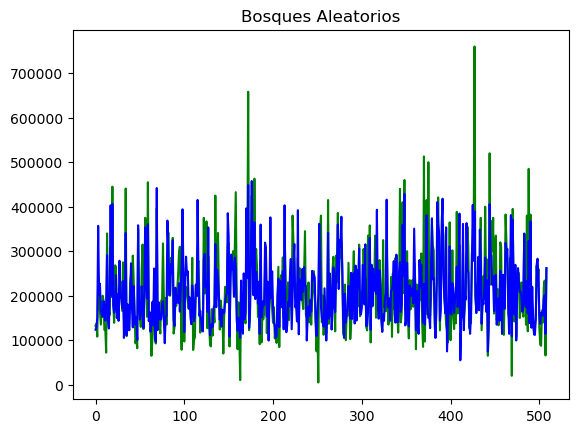

In [817]:
plt.title('Bosques Aleatorios')
plt.plot(y4_test, color='green')
plt.plot(sc_y.inverse_transform(  [y_randomForest]  ).reshape(509,1), color='blue')
plt.show

## PRUEBAS CON EL RESTO DE MODELOS, CON LOS DATOS DE DF_AUX Y CON LAS 10 VARIABLES 

## 10 variables mejores segun iteracion ODL

In [818]:
# 'valorTerreno', 'm2Util', 'numServi', 'numHabita','conVistas', 'construccion', 'aire', 'DormiDesde4', 'calef_aero', 'des_comuni'.

### Prueba de distintos SVR 

In [823]:
df_aux[['valorTerreno', 'm2Util', 'numServi', 'numHabita','conVistas', 'construccion', 'aire', 'DormiDesde4', 'calef_aero', 'des_comuni']].head(3)

,valorTerreno,m2Util,numServi,numHabita,conVistas,construccion,aire,DormiDesde4,calef_aero,des_comuni
0,50000,906,10,5,0,0,0,0,0,0
1,22300,1953,25,6,0,0,0,0,0,0
2,7300,1944,10,8,0,0,0,1,0,1


In [822]:
df_aux.iloc[:,[1,2,5,6,10,11,12,14,16,19]].head(3) # son estas las que 10 variables 

,valorTerreno,m2Util,numServi,numHabita,conVistas,construccion,aire,DormiDesde4,calef_aero,des_comuni
0,50000,906,10,5,0,0,0,0,0,0
1,22300,1953,25,6,0,0,0,0,0,0
2,7300,1944,10,8,0,0,0,1,0,1


In [659]:
df_aux.head(1)

,precio,valorTerreno,m2Util,numDormi,numChime,numServi,numHabita,calefaccion,alimentacion,tipoDesague,conVistas,construccion,aire,Dormi3,DormiDesde4,calef_elec,calef_aero,alim_elec,alim_gas,des_comuni
0,132500,50000,906,2,1,10,5,Electrica,Electrica,fosa septica,0,0,0,0,0,1,0,1,0,0


### Separar predictoras y objetivo

In [824]:
x4=df_aux.iloc[:,[1,2,5,6,10,11,12,14,16,19]].values # [[]] para que sea un array de arrays o sea matriz y luego no tenga que hacer el reshape en los modelos
y4=df_aux.iloc[:,[0]].values

### Division train-test

In [825]:
from sklearn.model_selection import train_test_split

In [826]:
x4_train,x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.30 , random_state = 1987) 

In [827]:
len(x4_train),len(x4_test), len(y4_train), len(y4_test)

(1186, 509, 1186, 509)

#### Normalizacion / estandarizacion

* En este tipo de modelo si que es necesario normalizar. Se hace despues de separar training y test.

In [828]:
from sklearn.preprocessing import StandardScaler

* Una transformacion para cada variable (en este caso x,y)

In [829]:
sc_x=StandardScaler()
x4_train=sc_x.fit_transform(x4_train)
x4_train

array([[-0.44415664,  1.1294505 , -1.41814033, ..., -0.68796215,
         0.74594266, -1.62420344],
       [ 0.1090394 , -0.48623347,  0.16409338, ...,  1.45356833,
         0.74594266,  0.61568642],
       [-0.69844836, -0.80279682, -1.41814033, ..., -0.68796215,
        -1.34058562,  0.61568642],
       ...,
       [-0.19432617, -0.96540313,  0.16409338, ..., -0.68796215,
         0.74594266,  0.61568642],
       [ 0.39902119, -1.33905168, -1.41814033, ..., -0.68796215,
        -1.34058562, -1.62420344],
       [-0.51553677, -0.74744148, -0.62702347, ..., -0.68796215,
        -1.34058562,  0.61568642]])

In [830]:
sc_y=StandardScaler()
y4_train=sc_y.fit_transform(y4_train)
y4_train

array([[-1.08433004],
       [-0.02092717],
       [-1.15443266],
       ...,
       [-0.34555624],
       [-1.20835775],
       [-0.31320118]])

#### Creacion del modelo

Pruebo con los distintos kernels

In [664]:
from sklearn.svm import SVR # de Super vector machine importamos Super vertor regression

Opciones de kernel de SVR 

- linear (para modelos lineales)
- poly (para modelos polinomicos)
- rbf (radial basic function o gaussiano para modelos radiales)
- sigmoid (sigmoidal para modelos sigmoides)
- precomputed (no es usado para ML convencional)

Otros parametros

- degree :  para indicar el grado del polinomio en kernel poly (por defecto 3)
- gamma: para darle escalado al sigmoide, rbf o poly (por defecto auto escalado)

In [831]:
reg_svr_klineal=SVR(kernel='linear')
reg_svr_klineal.fit(x4_train,y4_train.ravel())  # la advertencia es para el modelo lineal quiere un array 1D. Le agregue ravel para 1D

SVR(kernel='linear')

In [832]:
reg_svr_kpoly=SVR(kernel='poly')
reg_svr_kpoly.fit(x4_train,y4_train.ravel())  

SVR(kernel='poly')

In [833]:
reg_svr_kgauss=SVR(kernel='rbf')  # 
reg_svr_kgauss.fit(x4_train,y4_train.ravel())  

SVR()

In [834]:
reg_svr_ksigmoide=SVR(kernel='sigmoid')
reg_svr_ksigmoide.fit(x4_train,y4_train.ravel())  

SVR(kernel='sigmoid')

#### Prediccion

RECORDAR QUE APLICAMOS LA ESTANDARIZACION!!! 

* Para transformar fit.transform 
* Para volver fit.inverse



In [836]:
y_svr_klineal=reg_svr_klineal.predict(sc_x.fit_transform( x4_test ) )  # Transformar antes de pasar el valor y debe ser array de array
sc_y.inverse_transform(  [y_svr_klineal]  )                            # hay que hacer la inversa de la transformacion en 'y' para volver al rango de valores original

array([[126668.81286302,  99376.73348318, 141404.27217815,
        326485.62790635, 194632.78310916, 244927.40139147,
        130843.08398349, 192218.85880183, 152775.88193515,
        173294.08045251, 166609.66901825, 136758.51400233,
        141472.90289078, 244573.62406115, 120069.94052002,
        121882.5843682 , 159759.71123492, 375435.66459341,
        162035.00507119, 316457.53434175, 206422.18877499,
        159344.71808718, 180492.3276402 , 230061.45395724,
        149302.693895  , 223956.82695741, 114252.83966959,
        251011.9082811 , 203484.17892275, 168575.35248552,
        152823.46829759, 244416.67297   ,  98457.01780212,
        179149.2243407 , 295502.83325782, 107225.21643227,
        185331.20911261, 114378.6938186 , 136088.74174667,
        177365.91460108, 276590.3740674 , 166064.11011065,
        232090.27884916, 217553.60678839, 144261.93709592,
        138896.36113837, 146767.30748369,  83771.03899669,
        291836.48789635, 180278.38128409, 148561.7755056

In [837]:
y_svr_kpoly=reg_svr_kpoly.predict(sc_x.fit_transform(x4_test))
sc_y.inverse_transform( [y_svr_kpoly] )

array([[138138.10187842, 119396.51246021, 133080.86037824,
        313060.61246964, 204282.19073579, 244323.94839641,
        143276.44238454, 154977.13513954, 149818.25182691,
        170454.64227515, 160268.93980484, 135832.11184934,
        149578.59537215, 273219.37365695, 135610.07668776,
        143154.6952078 , 166146.14301879, 461123.77002412,
        165107.12070638, 379678.40173704, 198453.09398171,
        146550.47697311, 182441.37824882, 206543.77168066,
        155933.03534275, 187033.73132223, 129442.94290713,
        243584.37013317, 190637.67385654, 164520.55774664,
        156651.44046133, 239302.96002259, 106882.70509929,
        145645.535646  , 354738.49585035, 123109.52817478,
        178942.94664457, 139866.16988415, 149448.42524257,
        179022.08681032, 252535.45692727, 179623.58943089,
         56966.472057  , 197801.9797879 , 142650.90548002,
        154078.78095901, 153602.36078529,  80232.63901122,
        317461.18530491, 190968.32288337, 149885.3947812

In [838]:
y_svr_kgauss=reg_svr_kgauss.predict(sc_x.fit_transform(x4_test))
sc_y.inverse_transform( [y_svr_kgauss] )  

array([[124317.24295047, 115222.9856523 , 135932.24077767,
        338319.16928658, 215612.03576692, 249395.4788672 ,
        142345.46333558, 168747.59969523, 156020.63180212,
        169180.33185885, 161767.60476487, 133003.83236976,
        141797.70117229, 284280.64825293, 140938.7849703 ,
        129313.84448875, 169307.76867821, 356309.08681035,
        156655.4290124 , 342977.28454077, 213264.33611781,
        142859.68720796, 200249.91917799, 256777.87412545,
        153321.72978209, 191414.9454026 , 135195.61428424,
        239051.73231634, 211258.83461699, 170814.41508536,
        154831.95192273, 241102.97315227, 129646.221613  ,
        124056.50799958, 343768.27801556, 123375.54708019,
        183204.91425114, 125163.64702638, 135333.0577149 ,
        188639.02476262, 269791.78639357, 176148.82367582,
        188582.82815338, 239790.86801515, 155523.46225011,
        138336.19615814, 135264.56612312, 113615.11161959,
        350062.62077327, 177935.54323448, 144824.9758555

In [839]:
y_svr_ksigmoide=reg_svr_ksigmoide.predict(sc_x.fit_transform(x4_test))
sc_y.inverse_transform( [y_svr_ksigmoide] ) 

array([[ 2.84328612e+05, -1.37903781e+06,  6.32270596e+04,
         3.20193468e+06, -2.07400992e+06, -1.91616524e+05,
        -1.53258044e+06, -4.06917933e+05,  3.44120746e+05,
         5.16181866e+05,  5.65964624e+05,  3.66968837e+05,
        -3.48427052e+05, -1.18482215e+05, -1.08339310e+05,
        -7.04693269e+05,  3.17103418e+05,  8.57913144e+05,
         3.17540938e+05,  3.23324427e+06,  2.34299776e+05,
         4.88231515e+05,  2.94316345e+05, -1.51098335e+05,
         5.15542609e+05,  6.70750075e+05, -4.58373000e+05,
        -9.63398931e+05,  1.90544349e+04,  2.94250983e+05,
         3.98689149e+05,  3.24931661e+04, -1.35643802e+06,
         2.29834765e+05,  7.17509584e+05, -8.39976918e+04,
         1.84452522e+05, -8.38407059e+05,  2.79806853e+05,
         1.94108895e+05,  1.52607602e+06,  4.11700556e+05,
        -2.55991372e+05, -1.24797679e+05,  1.01783156e+06,
         3.52189125e+05, -5.73697034e+04, -1.77183032e+06,
         1.01845116e+04,  6.10652947e+05,  5.22948963e+0

#### Evaluacion de los modelos



In [692]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

En el calculo de los estadisticos no hace falta transformar. Hacemos la prediccion directamente sobre x

NOTA: En estos ejemplos no estan corregidos los mae y mse. Habria que transformar las variables.

El R2 da bien aunque no se transforme ni se haga la inversa de la transformacion.

* Kernel lineal 

In [ ]:
## tuve que hacer un reshape para que quedara como el y4_test

In [840]:
r2_klineal=r2_score(y4_test, sc_y.inverse_transform(  [y_svr_klineal]  ).reshape(509,1) ) 
mae_klineal=mean_absolute_error(y4_test, sc_y.inverse_transform(  [y_svr_klineal]  ).reshape(509,1))
mse_klineal=mean_squared_error(y4_test, sc_y.inverse_transform(  [y_svr_klineal]  ).reshape(509,1))
print(f'Estadisticos de la SVR con kernel lineal\n r2: {r2_klineal:.2f} \n mae: {mae_klineal:.2f} \n mse: {mse_klineal:.2f}')


Estadisticos de la SVR con kernel lineal
 r2: 0.57 
 mae: 42524.57 
 mse: 3736309424.54


* Kernel polinomico

In [841]:
r2_kpoly=r2_score(y4_test, sc_y.inverse_transform(  [y_svr_kpoly]  ).reshape(509,1) ) 
mae_kpoly=mean_absolute_error(y4_test, sc_y.inverse_transform(  [y_svr_kpoly]  ).reshape(509,1)  )
mse_kpoly=mean_squared_error(y4_test, sc_y.inverse_transform(  [y_svr_kpoly]  ).reshape(509,1)   )
print(f'Estadisticos de la SVR con kernel polinomico\n r2: {r2_kpoly:.2f} \n mae: {mae_kpoly:.2f} \n mse: {mse_kpoly:.2f}')


Estadisticos de la SVR con kernel polinomico
 r2: 0.57 
 mae: 42748.10 
 mse: 3729324352.33


* Kernel Gaussiano o radial (rbf)

In [842]:
r2_kgauss=r2_score(y4_test, sc_y.inverse_transform(  [y_svr_kgauss]  ).reshape(509,1)  ) 
mae_kgauss=mean_absolute_error(y4_test, sc_y.inverse_transform(  [y_svr_kgauss]  ).reshape(509,1))
mse_kgauss=mean_squared_error(y4_test, sc_y.inverse_transform(  [y_svr_kgauss]  ).reshape(509,1))
print(f'Estadisticos de la SVR con kernel radial\n r2: {r2_kgauss:.2f} \n mae: {mae_kgauss:.2f} \n mse: {mse_kgauss:.2f}')


Estadisticos de la SVR con kernel radial
 r2: 0.59 
 mae: 41318.00 
 mse: 3603536127.10


### Analisis de las diferencias entre y_test / y_test_predict 

In [884]:
import seaborn as sn

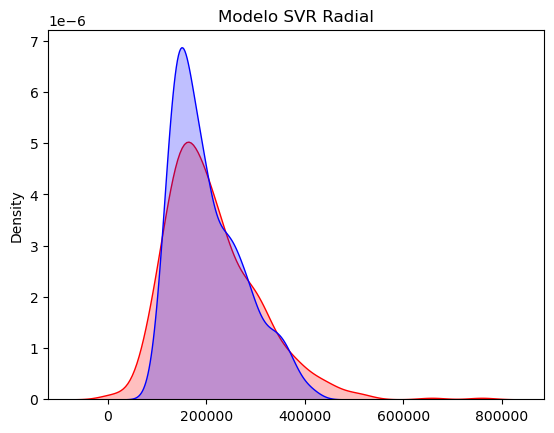

In [935]:
# KDE Plot with seaborn
plt.title('Modelo SVR Radial')
res = sn.kdeplot(y4_test.ravel(), color='red', shade='True')
res2 = sn.kdeplot(sc_y.inverse_transform([y_svr_kgauss]).ravel(), color='blue', shade='False')
plt.show()

In [936]:
Diferencias_SVR_Radial=np.round(y4_test.ravel()-sc_y.inverse_transform([y_svr_kgauss]).ravel())

<AxesSubplot:ylabel='Density'>

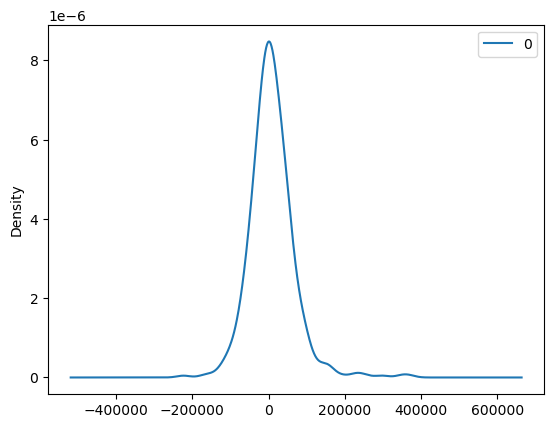

In [938]:
pd.DataFrame(Diferencias_SVR_Radial).plot.kde()

<AxesSubplot:>

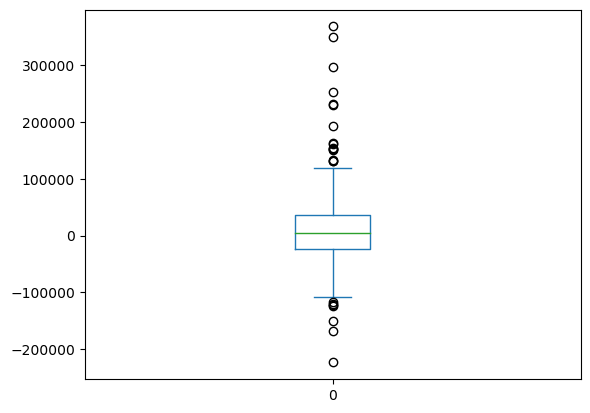

In [939]:
pd.DataFrame(Diferencias_SVR_Radial).plot.box()

* Kernel Sigmoide

In [843]:
r2_ksigm=r2_score(y4_test, sc_y.inverse_transform(  [y_svr_ksigmoide]  ).reshape(509,1) ) 
mae_ksigm=mean_absolute_error(y4_test, sc_y.inverse_transform(  [y_svr_ksigmoide]  ).reshape(509,1))
mse_ksigm=mean_squared_error(y4_test, sc_y.inverse_transform(  [y_svr_ksigmoide]  ).reshape(509,1))
print(f'Estadisticos de la SVR con kernel Sigmoide\n r2: {r2_ksigm:.2f} \n mae: {mae_ksigm:.2f} \n mse: {mse_ksigm:.2f}')
# Esto da muy mal

Estadisticos de la SVR con kernel Sigmoide
 r2: -128.52 
 mae: 630402.17 
 mse: 1133579263047.73


<function matplotlib.pyplot.show(close=None, block=None)>

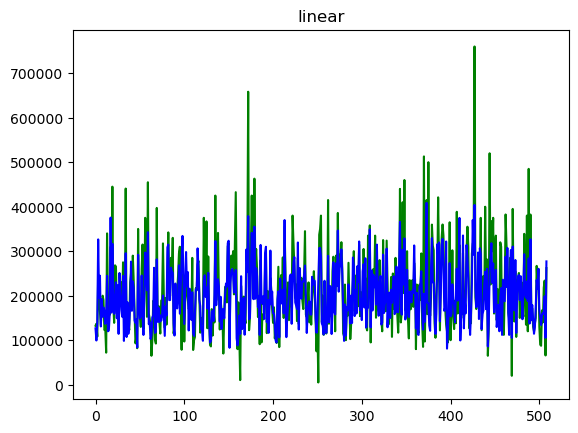

In [844]:
plt.title('linear')
plt.plot(y4_test, color='green')
plt.plot(sc_y.inverse_transform(  [y_svr_klineal]  ).reshape(509,1), color='blue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

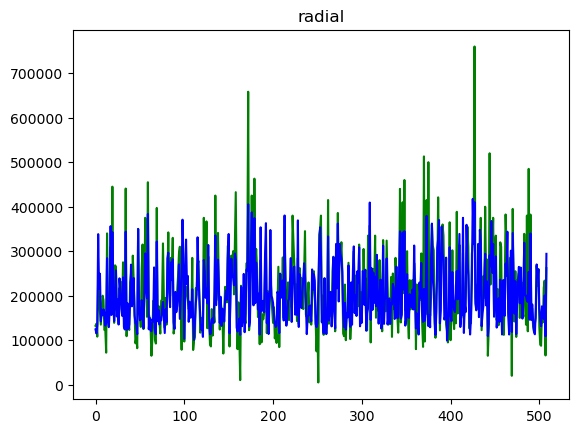

In [845]:
plt.title('radial')
plt.plot(y4_test, color='green')
plt.plot(sc_y.inverse_transform(  [y_svr_kgauss]  ).reshape(509,1), color='blue')
plt.show

###  ARBOL DE DECISION

In [277]:
# from sklearn.metrics import r2_score

In [ ]:
# Sobre las mismas cuatro varibles que mejor correlacionan con precio para no sobrecargar el modelo.

### Separar predictoras y objetivo

In [846]:
x5=df_aux.iloc[:,[1,2,5,6,10,11,12,14,16,19]].values # [[]] para que sea un array de arrays o sea matriz y luego no tenga que hacer el reshape en los modelos
y5=df_aux.iloc[:,[0]].values

### Division train-test

In [269]:
from sklearn.model_selection import train_test_split

In [847]:
x5_train,x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size = 0.30 , random_state = 1987) 

In [848]:
len(x5_train),len(x5_test), len(y5_train), len(y5_test)

(1186, 509, 1186, 509)

#### Normalizacion / estandarizacion

* En este tipo de modelo si que es necesario normalizar. 
* Se hace despues de separar training y test para que los datos de training no interfieran en los de test.

In [661]:
from sklearn.preprocessing import StandardScaler

* Una transformacion para cada variable (en este caso x,y)

In [849]:
sc_x=StandardScaler()
x5_train=sc_x.fit_transform(x5_train)
x5_train

array([[-0.44415664,  1.1294505 , -1.41814033, ..., -0.68796215,
         0.74594266, -1.62420344],
       [ 0.1090394 , -0.48623347,  0.16409338, ...,  1.45356833,
         0.74594266,  0.61568642],
       [-0.69844836, -0.80279682, -1.41814033, ..., -0.68796215,
        -1.34058562,  0.61568642],
       ...,
       [-0.19432617, -0.96540313,  0.16409338, ..., -0.68796215,
         0.74594266,  0.61568642],
       [ 0.39902119, -1.33905168, -1.41814033, ..., -0.68796215,
        -1.34058562, -1.62420344],
       [-0.51553677, -0.74744148, -0.62702347, ..., -0.68796215,
        -1.34058562,  0.61568642]])

In [850]:
sc_y=StandardScaler()
y5_train=sc_y.fit_transform(y5_train)
y5_train

array([[-1.08433004],
       [-0.02092717],
       [-1.15443266],
       ...,
       [-0.34555624],
       [-1.20835775],
       [-0.31320118]])

#### Crear modelo

In [737]:
from sklearn.tree import DecisionTreeRegressor

R2 para distintos criterion

                'squared_error' .24
                'friedman_mse' .25, con min_samples_split=5 .31, min_samples_split=10 .40, max_leaf_nodes=100
                'absolute_error' .15

In [851]:
reg_arbol=DecisionTreeRegressor(criterion='squared_error', min_samples_split=15, max_leaf_nodes=200, random_state=1987)
reg_arbol.fit(x5_train,y5_train)

DecisionTreeRegressor(max_leaf_nodes=200, min_samples_split=15,
                      random_state=1987)

#### Prediccion para test

In [852]:
y_arbol=reg_arbol.predict(sc_x.fit_transform(x5_test))
sc_y.inverse_transform([y_arbol])

array([[102340.        , 141709.71428571, 174277.77777778,
        359876.66666667, 131000.        , 208280.        ,
        191278.57142857, 177268.63636364, 134243.5       ,
        191278.57142857, 134066.66666667, 176753.        ,
        191278.57142857, 285616.66666667, 174277.77777778,
        138100.        , 191278.57142857, 457333.33333333,
        191278.57142857, 454725.        , 173523.07692308,
        168996.        , 205158.33333333, 231034.625     ,
        160494.57142857, 163279.16666667, 140174.15384615,
        245000.        , 160500.        , 131000.        ,
        176753.        , 196597.        , 127529.16666667,
        177268.63636364, 371900.9       , 127529.16666667,
        173523.07692308, 138100.        ,  80441.66666667,
        170916.66666667, 317372.22222222, 176753.        ,
        138100.        , 231034.625     , 134066.66666667,
        119187.        , 168996.        , 113368.14285714,
        371900.9       , 173300.        , 110666.6666666

#### Evaluacion del modelo (r2, mae,mse)

In [37]:
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [853]:
r2_arbol=r2_score(y5_test, sc_y.inverse_transform([y_arbol]).reshape(509,1) ) 
mae_arbol=mean_absolute_error(y5_test, sc_y.inverse_transform([y_arbol]).reshape(509,1))
mse_arbol=mean_squared_error(y5_test, sc_y.inverse_transform([y_arbol]).reshape(509,1))
print(f'Estadisticos de la regresion por Arbol de Desicion\n r2: {r2_arbol:.2f} \n mae: {mae_arbol:.2f} \n mse: {mse_arbol:.2f}')


Estadisticos de la regresion por Arbol de Desicion
 r2: 0.42 
 mae: 49333.80 
 mse: 5080109298.68


<function matplotlib.pyplot.show(close=None, block=None)>

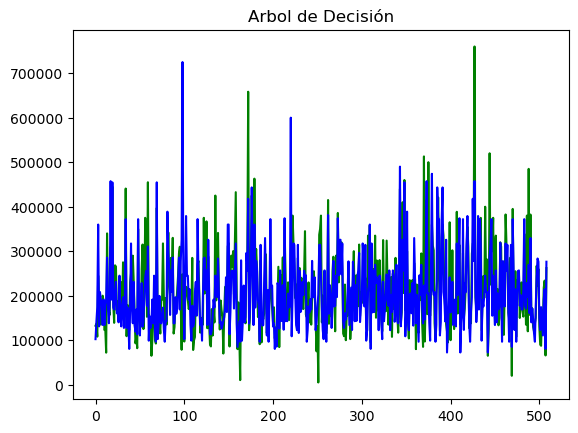

In [854]:
plt.title('Arbol de Decisión')
plt.plot(y5_test, color='green')
plt.plot(sc_y.inverse_transform(  [y_arbol]  ).reshape(509,1), color='blue')
plt.show

## Bosques Aleatorios

### Separar predictoras y objetivo

In [855]:
x6=df_aux.iloc[:,[1,2,5,6,10,11,12,14,16,19]].values # [[]] para que sea un array de arrays o sea matriz y luego no tenga que hacer el reshape en los modelos
y6=df_aux.iloc[:,[0]].values

### Division train-test

In [269]:
from sklearn.model_selection import train_test_split

In [856]:
x6_train,x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size = 0.30 , random_state = 1987) 

In [857]:
len(x6_train),len(x6_test), len(y6_train), len(y6_test)

(1186, 509, 1186, 509)

#### Normalizacion / estandarizacion

* En este tipo de modelo si que es necesario normalizar. 
* Se hace despues de separar training y test para que los datos de training no interfieran en los de test.

In [661]:
from sklearn.preprocessing import StandardScaler

* Una transformacion para cada variable (en este caso x,y)

In [858]:
sc_x=StandardScaler()
x6_train=sc_x.fit_transform(x6_train)
x6_train

array([[-0.44415664,  1.1294505 , -1.41814033, ..., -0.68796215,
         0.74594266, -1.62420344],
       [ 0.1090394 , -0.48623347,  0.16409338, ...,  1.45356833,
         0.74594266,  0.61568642],
       [-0.69844836, -0.80279682, -1.41814033, ..., -0.68796215,
        -1.34058562,  0.61568642],
       ...,
       [-0.19432617, -0.96540313,  0.16409338, ..., -0.68796215,
         0.74594266,  0.61568642],
       [ 0.39902119, -1.33905168, -1.41814033, ..., -0.68796215,
        -1.34058562, -1.62420344],
       [-0.51553677, -0.74744148, -0.62702347, ..., -0.68796215,
        -1.34058562,  0.61568642]])

In [859]:
sc_y=StandardScaler()
y6_train=sc_y.fit_transform(y6_train)
y6_train

array([[-1.08433004],
       [-0.02092717],
       [-1.15443266],
       ...,
       [-0.34555624],
       [-1.20835775],
       [-0.31320118]])

#### Crear el modelo Random Forest


* Parametros:
    
        - n_estimators: numero de arboles, por defecto 100. Habitualmente entre 300 y 1000.
        - criterion: squared_error, absolute_error, friedman_mse, poisson. Por defecto squared_error
        - max_depth: profundidad
        - min_samples_split: numero de muestras minimo
        - min_samples_leaf: numero de muestras maximo
        - max_features: maximo numero de caracteristicas. Por defecto 'auto'. El modelo probará con una, con dos, etc.

In [781]:
from sklearn.ensemble import RandomForestRegressor

* criterion=squared_error
                        n_estimators=100, r2=0.53 (con mas estimadores no cambia)
* criterion=absolute_error
                        n_estimators=100, r2=0.54 (con mas estimadores no cambia)
                        n_estimators=500, r2= 0.55
* criterion=friedman_mse
                        n_estimators=500, r2= 0.53 (con mas estimadores no cambia)

In [874]:
reg_randomForest=RandomForestRegressor(n_estimators=500, criterion='absolute_error', max_features='auto', random_state=1987)
reg_randomForest.fit(x6_train,y6_train) # ya estan normalizadas

C:\Users\carolina\AppData\Local\Temp\ipykernel_18076\142823128.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_randomForest.fit(x6_train,y6_train) # ya estan normalizadas
C:\Users\carolina\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(criterion='absolute_error', max_features='auto',
                      n_estimators=500, random_state=1987)

#### Prediccion para test

In [875]:
y_randomForest=reg_randomForest.predict(sc_x.fit_transform(x6_test))
sc_y.inverse_transform([y_randomForest])

array([[118379.96 , 133424.769, 153554.995, 349360.865, 230085.934,
        226036.28 , 149239.21 , 178224.55 , 162678.   , 183332.716,
        166779.374, 131097.198, 171528.78 , 287011.652, 146966.168,
        133969.318, 189883.688, 387536.78 , 180527.47 , 357216.884,
        174777.382, 154146.195, 183839.624, 244080.752, 148724.162,
        190182.536, 136526.014, 240310.398, 216678.14 , 187611.3  ,
        175459.482, 234586.654, 118140.412, 150184.13 , 355542.216,
        115528.496, 178390.118, 124311.138, 114912.11 , 190735.306,
        269154.026, 163772.77 , 142861.354, 221416.602, 161199.58 ,
        130476.75 , 147655.006, 126449.247, 421367.89 , 200387.31 ,
        152384.09 , 147599.422, 221262.032, 196977.776, 126524.946,
        191513.954, 333296.95 , 236212.894, 192659.014, 360219.318,
        143651.655, 164365.65 , 126774.44 , 139843.492, 179000.288,
        139455.11 , 240885.606, 112963.13 ,  96208.636, 424827.442,
        123336.524, 187976.9  , 151124.304, 1461

#### Evaluacion del modelo (r2, mae,mse)

In [37]:
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [876]:
r2_arbol=r2_score(y6_test, sc_y.inverse_transform([y_randomForest]).reshape(509,1) ) 
mae_arbol=mean_absolute_error(y5_test, sc_y.inverse_transform([y_randomForest]).reshape(509,1))
mse_arbol=mean_squared_error(y5_test, sc_y.inverse_transform([y_randomForest]).reshape(509,1))
print(f'Estadisticos de la regresion por Bosques Aleatorios\n r2: {r2_arbol:.2f} \n mae: {mae_arbol:.2f} \n mse: {mse_arbol:.2f}')


Estadisticos de la regresion por Bosques Aleatorios
 r2: 0.59 
 mae: 41970.68 
 mse: 3555614933.66


### Analisis de las diferencias entre y_test / y_test_predict 

In [884]:
import seaborn as sn

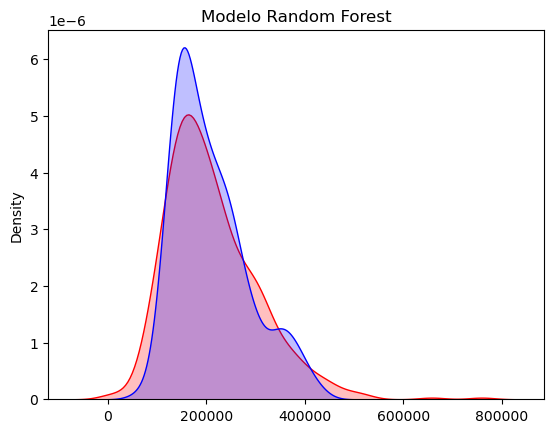

In [949]:
# KDE Plot with seaborn
plt.title('Modelo Random Forest')d
res = sn.kdeplot(y6_test.ravel(), color='red', shade='True')
res2 = sn.kdeplot(sc_y.inverse_transform([y_randomForest]).reshape(509,1).ravel(), color='blue', shade='False')
plt.show()

In [950]:
Diferencias_RandomForest=np.round(y6_test.ravel()-sc_y.inverse_transform([y_randomForest]).reshape(509,1).ravel())

<AxesSubplot:ylabel='Density'>

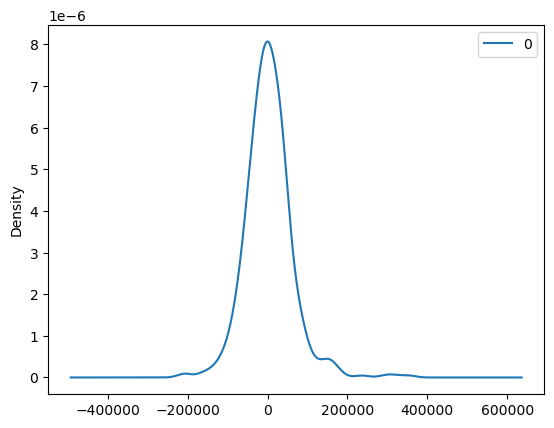

In [951]:
pd.DataFrame(Diferencias_RandomForest).plot.kde()

<AxesSubplot:>

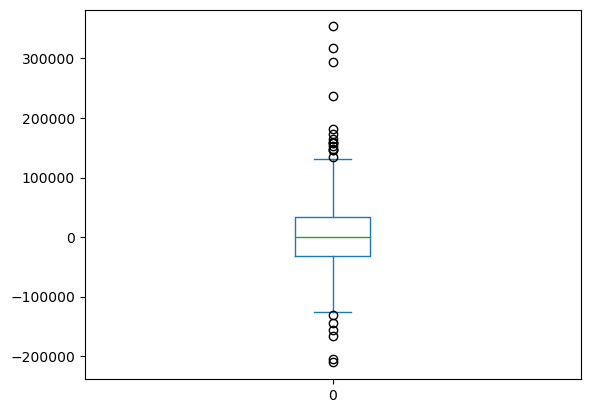

In [952]:
pd.DataFrame(Diferencias_RandomForest).plot.box()

<function matplotlib.pyplot.show(close=None, block=None)>

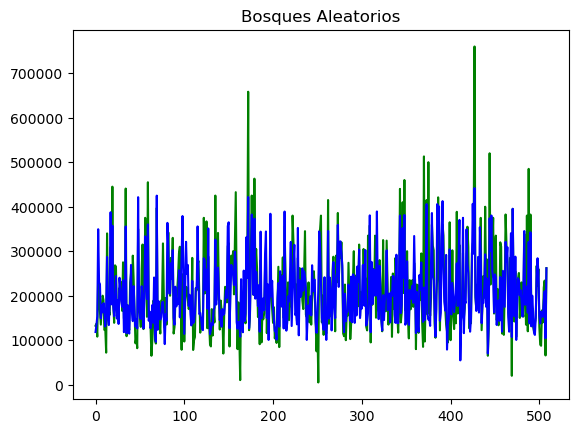

In [863]:
plt.title('Bosques Aleatorios')
plt.plot(y4_test, color='green')
plt.plot(sc_y.inverse_transform(  [y_randomForest]  ).reshape(509,1), color='blue')
plt.show